# *************************************************************
#Pontifícia Universidade Católica de Minas Gerais - PUC-Minas
# Pós Graduação em Ciência de Dados e Big Data
# Trabalho de Conclusão de Curso
## Um Modelo de Aprendizado de Máquina Supervisionado para Previsão de Quantidade de Público nos Jogos do Campeonato Brasileiro de Futebol

## Autor: Salomão Fernandes de Freitas Júnior
## FEVEREIRO/2024


## ETAPA 2: Preparação de Dados

## Importação de Bibliotecas e Leitura de datasets





In [2]:
# Importação de Bibliotecas
import pandas as pd
import missingno as missing # biblioteca interessante para visualização gráfica dos dados nulos
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import math



In [3]:
#warnings.filterwarnings("ignore") # Para não exibir warnings nas saídas das execuções dos códigos

In [4]:
# Leitura dos datasets
# Este dataset contém dados de 29/03/2003 a 26/10/2023, obtidos em https://basedosdados.org/dataset/c861330e-bca2-474d-9073-bc70744a1b23?table=18835b0d-233e-4857-b454-1fa34a81b4fa
df_brasileirao = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PUC Minas - TCC Ciência de Dados/Datasets/brasileirao_serie_a.csv', sep= ';')

# Os demais dados (27/10/2023 a 07/12/2023) preenchemos com dados obtidos em https://www.srgoool.com.br/
# Estão neste dataset
df_brasileirao_comp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PUC Minas - TCC Ciência de Dados/Datasets/brasileirao_serie_a_dados_complementares_2023.csv', sep= ';')



display(df_brasileirao.head())
print('')
print('')
display(df_brasileirao_comp.head())

,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,...,chutes_bola_parada_mandante,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante
0,2017,21/05/2017,2,Arena Condá,André Luiz de Freitas Castro,10323.0,22600.0,Chapecoense,Palmeiras,Vágner Mancini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,30/05/2017,3,Arena Condá,Marcelo de Lima Henrique,6188.0,22600.0,Chapecoense,Avaí FC,Vágner Mancini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,09/06/2017,5,Arena Condá,Rodolpho Toski Marques,14403.0,22600.0,Chapecoense,Grêmio,Vágner Mancini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,15/06/2017,7,Arena Condá,Jailson Macedo Freitas,10033.0,22600.0,Chapecoense,Vasco da Gama,Vágner Mancini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,18/06/2017,8,Arena Condá,Marcelo Aparecido Ribeiro de Souza,11603.0,22600.0,Chapecoense,Botafogo,Vágner Mancini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,...,chutes_bola_parada_mandante,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante
0,2023,23/11/2023,29,NaN,NaN,25206,25206,Fortaleza,Botafogo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,28/10/2023,30,NaN,NaN,33747,33747,Palmeiras,EC Bahia,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,28/10/2023,30,NaN,NaN,1836,1836,América-MG,Grêmio,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,28/10/2023,30,NaN,NaN,19358,19358,Atlético-MG,Fluminense,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,29/10/2023,30,NaN,NaN,10145,10145,Goiás,Vasco da Gama,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Visualizando as colunas do DF e seu tipos de dados
df_brasileirao.dtypes

ano_campeonato                      int64
data                               object
rodada                              int64
estadio                            object
arbitro                            object
publico                           float64
publico_max                       float64
time_mandante                      object
time_visitante                     object
tecnico_mandante                   object
tecnico_visitante                  object
colocacao_mandante                float64
colocacao_visitante               float64
valor_equipe_titular_mandante     float64
valor_equipe_titular_visitante    float64
idade_media_titular_mandante      float64
idade_media_titular_visitante     float64
gols_mandante                     float64
gols_visitante                    float64
gols_1_tempo_mandante             float64
gols_1_tempo_visitante            float64
escanteios_mandante               float64
escanteios_visitante              float64
faltas_mandante                   

## SELEÇÃO DE ATRIBUTOS

### Em nossa Análise Exploratória prévia, no Notebook 01 - Análise Exploratória, já identificamos os atributos de interesse, conforme nossos requisitos (VER TRABALHO). Vamos manter somente estes em nossos datasets

In [6]:
#Selecionando somente as colunas (atributos) de interesse
col_interesse = ['ano_campeonato', 'data', 'rodada', 'publico', 'time_mandante', 'time_visitante', 'colocacao_mandante', 'colocacao_visitante',
                 'valor_equipe_titular_mandante', 'valor_equipe_titular_visitante', 'gols_mandante', 'gols_visitante']

df_brasileirao = df_brasileirao[col_interesse]
df_brasileirao_comp = df_brasileirao_comp[col_interesse]

#df_brasileirao.head()
display(df_brasileirao.sample(10))
print('')
print('')
display(df_brasileirao_comp.sample(10))

,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
5794,2004,12/09/2004,30,NaN,Palmeiras,Santos FC,NaN,NaN,NaN,NaN,1.0,2.0
5055,2003,10/07/2003,17,NaN,EC Bahia,Guarani,NaN,NaN,NaN,NaN,2.0,0.0
7653,2023,08/10/2023,26,39133.0,Internacional,Grêmio,12.0,3.0,4945.0,3535.0,3.0,2.0
4240,2018,07/06/2018,10,27586.0,Corinthians,Santos FC,8.0,14.0,36400000.0,38750000.0,1.0,1.0
5477,2004,02/05/2004,4,NaN,Juventude,Paraná,NaN,NaN,NaN,NaN,4.0,0.0
4312,2018,29/07/2018,16,9795.0,Atlético-PR,EC Vitória,18.0,14.0,10550000.0,9300000.0,4.0,0.0
6546,2013,15/08/2013,14,32049.0,Goiás EC,Flamengo,12.0,16.0,4700000.0,14600000.0,1.0,1.0
4346,2018,14/06/2018,12,19497.0,Sport Recife,Grêmio,7.0,4.0,13250000.0,49350000.0,0.0,0.0
3270,2012,01/09/2012,21,8943.0,Figueirense FC,Fluminense,20.0,2.0,4400000.0,21600000.0,2.0,2.0
7198,2014,28/05/2014,8,8415.0,Criciúma EC,Coritiba FC,14.0,19.0,4700000.0,6150000.0,1.0,0.0


,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
11,2023,31/10/2023,31,33936,EC Bahia,Fluminense,15,8,NaN,NaN,1,0
27,2023,05/11/2023,32,11269,Coritiba FC,Goiás,19,18,NaN,NaN,0,1
71,2023,02/12/2023,37,40338,Corinthians,Internacional,13,9,NaN,NaN,1,2
44,2023,12/11/2023,34,9869,RB Bragantino,Botafogo,5,2,NaN,NaN,2,2
73,2023,03/12/2023,37,29986,Palmeiras,Fluminense,1,7,NaN,NaN,1,0
85,2023,06/12/2023,38,14130,Santos,Fortaleza,17,10,NaN,NaN,1,2
58,2023,26/11/2023,35,39504,Fortaleza,Palmeiras,12,1,NaN,NaN,2,2
29,2023,06/11/2023,32,12923,Santos,Cuiabá-MT,15,12,NaN,NaN,0,0
22,2023,04/11/2023,32,4401,América-MG,Atlético-MG,20,6,NaN,NaN,1,1
7,2023,29/10/2023,30,36272,Internacional,Coritiba FC,13,19,NaN,NaN,3,4


## AJUSTES DE VALORES E TIPOS DE DADOS

### Em nossa Análise exploratória prévia no Notebook 01 - Análise Exploratória, ao analisar as tabelas de frequência dos atributos time_mandante e time_visitante, pudemos perceber que os seguintes times aparecem duplicados, com nomes diferentes:

- Athletico-PR x Atlético-PR
- Goiás x Goiás EC
- Santos x Santos FC

Assim, agora iremos que padronizar esses nomes.

Ao preencher os dados complementares (27/10/2024 a 07/12/2024), já utlizamos nomes padronizados (Athletico-PR, Goiás, Santos), os quais iremos utlizar para ajuste no dataset maior

In [7]:
# Visualizando as tabelas de frequência com a duplicidade
cols = ['time_mandante', 'time_visitante']

for col in cols:
  df_freq = df_brasileirao[col].value_counts().reset_index().rename(columns={'index': col, col: 'count'}).sort_values([col])
  display(df_freq)
  print('')
  print('')



,time_mandante,count
27,América-MG,109
42,América-RN,19
29,Athletico-PR,91
24,Atlético-GO,133
3,Atlético-MG,375
12,Atlético-PR,285
25,Avaí FC,133
38,Barueri,38
10,Botafogo,337
45,Brasiliense-DF,19


,time_visitante,count
27,América-MG,110
44,América-RN,19
29,Athletico-PR,90
21,Atlético-GO,133
5,Atlético-MG,376
12,Atlético-PR,285
23,Avaí FC,133
39,Barueri,38
9,Botafogo,337
46,Brasiliense-DF,19


In [8]:
# Ajustando os nomes Atlético-PR, Goiás EC e Santos FC, com Athletico-PR, Goiás e Santos
# NO dataset maior

df_brasileirao.loc[df_brasileirao['time_mandante'] == 'Atlético-PR' , 'time_mandante'] = 'Athletico-PR'
df_brasileirao.loc[df_brasileirao['time_visitante'] == 'Atlético-PR' , 'time_visitante'] = 'Athletico-PR'

df_brasileirao.loc[df_brasileirao['time_mandante'] == 'Goiás EC' , 'time_mandante'] = 'Goiás'
df_brasileirao.loc[df_brasileirao['time_visitante'] == 'Goiás EC' , 'time_visitante'] = 'Goiás'

df_brasileirao.loc[df_brasileirao['time_mandante'] == 'Santos FC' , 'time_mandante'] = 'Santos'
df_brasileirao.loc[df_brasileirao['time_visitante'] == 'Santos FC' , 'time_visitante'] = 'Santos'


#print(df[df['time_visitante'] == 'Atlético-PR']['time_visitante'].count())
#print(df[df['time_visitante'] == 'Athletico-PR']['time_visitante'].count())

#df_brasileirao

In [9]:
# Visualizando as tabelas de frequência sem a duplicidade, após o ajuste
cols = ['time_mandante', 'time_visitante']

for col in cols:
  df_freq = df_brasileirao[col].value_counts().reset_index().rename(columns={'index': col, col: 'count'}).sort_values([col])
  display(df_freq)
  print('')
  print('')


,time_mandante,count
27,América-MG,109
41,América-RN,19
4,Athletico-PR,376
25,Atlético-GO,133
5,Atlético-MG,375
24,Avaí FC,133
37,Barueri,38
11,Botafogo,337
42,Brasiliense-DF,19
38,CSA,19


,time_visitante,count
27,América-MG,110
38,América-RN,19
7,Athletico-PR,375
24,Atlético-GO,133
6,Atlético-MG,376
25,Avaí FC,133
37,Barueri,38
10,Botafogo,337
39,Brasiliense-DF,19
42,CSA,19


In [10]:
# Visualizando as colunas do DF e seu tipos de dados
df_brasileirao.dtypes
#df_brasileirao_comp.dtypes

ano_campeonato                      int64
data                               object
rodada                              int64
publico                           float64
time_mandante                      object
time_visitante                     object
colocacao_mandante                float64
colocacao_visitante               float64
valor_equipe_titular_mandante     float64
valor_equipe_titular_visitante    float64
gols_mandante                     float64
gols_visitante                    float64
dtype: object

In [11]:
# Observa-se que apenas a coluna data não foi reconhecida com o tipo correto (datetime)
# Vamos então proceder com o ajuste do tipo de dados para datetime, nos dois dataframes

df_brasileirao['data'] = pd.to_datetime(df_brasileirao['data'], dayfirst=True)
df_brasileirao_comp['data'] = pd.to_datetime(df_brasileirao_comp['data'], dayfirst=True)

# Visualizando novamente os tipos de dados, após a transformação
df_brasileirao.dtypes
#df_brasileirao_comp.dtypes

# df["Data"] = pd.to_datetime(df["Data"])
# Agrupamento por ano
# agrupamento_ano = df.groupby(df["Data"].dt.year)["Vendas"].sum()
# https://pt.linkedin.com/pulse/trabalhando-com-datas-pandas-fernanda-santos


ano_campeonato                             int64
data                              datetime64[ns]
rodada                                     int64
publico                                  float64
time_mandante                             object
time_visitante                            object
colocacao_mandante                       float64
colocacao_visitante                      float64
valor_equipe_titular_mandante            float64
valor_equipe_titular_visitante           float64
gols_mandante                            float64
gols_visitante                           float64
dtype: object

In [12]:
df_brasileirao.head()

,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
0,2017,2017-05-21,2,10323.0,Chapecoense,Palmeiras,11.0,2.0,12050000.0,21500000.0,1.0,0.0
1,2017,2017-05-30,3,6188.0,Chapecoense,Avaí FC,6.0,17.0,12050000.0,6550000.0,2.0,0.0
2,2017,2017-06-09,5,14403.0,Chapecoense,Grêmio,1.0,3.0,12050000.0,28300000.0,3.0,6.0
3,2017,2017-06-15,7,10033.0,Chapecoense,Vasco da Gama,4.0,11.0,12050000.0,9600000.0,2.0,1.0
4,2017,2017-06-18,8,11603.0,Chapecoense,Botafogo,4.0,12.0,12300000.0,10400000.0,0.0,2.0


## ANÁLISE DE VALORES NULOS

### Em nossa Análise Exploratória prévia, no Notebook 01 - Análise Exploratória, identificamos que alguns atributos possuem valores nulos em algumas linhas.
### Agora vamos tratar cada caso, optando por alguma estratégia de preenchimento desses valores, ou mesmo pela exclusão de linha que apresentam atributos com valor nulo.
### Vamos Tratar ainda cada dataset separadamente, e logo após o tratamento dos dados nulos, vamos unir as bases em um só dataframe, antes de prosseguir com as próximas sub-etapas da preparação de dados.

### Tratando nulos do dataset menor df_brasileirao_comp

In [13]:
# VAMOS PRIMEIRAMENTE TRATAR A BASE COM DADOS COMPLEMENTARES (PERÍODO DE 27/10/2023 a 07/12/2023)
# COMO NÓS QUE FIZEMOS O SEU PREENCHIMENTO, JÁ SABEMOS QUE OS ATRIBUTOS valor_equipe_titular_mandante	valor_equipe_titular_visitante ESTÃO NULOS

#df_brasileirao_comp.info()

In [14]:
# Verificando a quantidade de nulos em cada atributo
# Confirmando os nossos atributos com 100% dos valores nulos
# e os demais totalmente preenchidos
print(df_brasileirao_comp.isnull().sum())
print('(Linhas, Colunas) = {}'.format(df_brasileirao_comp.shape))

ano_campeonato                     0
data                               0
rodada                             0
publico                            0
time_mandante                      0
time_visitante                     0
colocacao_mandante                 0
colocacao_visitante                0
valor_equipe_titular_mandante     91
valor_equipe_titular_visitante    91
gols_mandante                      0
gols_visitante                     0
dtype: int64
(Linhas, Colunas) = (91, 12)


In [15]:
# Visualizando o dataframe
df_brasileirao_comp.head(10)

,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
0,2023,2023-11-23,29,25206,Fortaleza,Botafogo,9,1,NaN,NaN,2,2
1,2023,2023-10-28,30,33747,Palmeiras,EC Bahia,2,15,NaN,NaN,1,0
2,2023,2023-10-28,30,1836,América-MG,Grêmio,20,5,NaN,NaN,3,4
3,2023,2023-10-28,30,19358,Atlético-MG,Fluminense,6,8,NaN,NaN,2,0
4,2023,2023-10-29,30,10145,Goiás,Vasco da Gama,17,18,NaN,NaN,1,1
5,2023,2023-10-29,30,26579,Athletico-PR,São Paulo,7,12,NaN,NaN,1,1
6,2023,2023-10-29,30,41950,Corinthians,Santos,14,16,NaN,NaN,1,1
7,2023,2023-10-29,30,36272,Internacional,Coritiba FC,13,19,NaN,NaN,3,4
8,2023,2023-10-29,30,27859,Botafogo,Cuiabá-MT,1,10,NaN,NaN,0,1
9,2023,2023-11-18,30,30144,Fortaleza,Cruzeiro,9,11,NaN,NaN,0,1


In [16]:
# PARA ESTE DATASET, NOSSO TRATAMENTO É MAIS SIMPLES
# OS ATRIBUTOS QUE POSSUEM VALORES NULOS REPRESENTAM O VALOR ESTIMADO DOS TIMES VISTANTE E MANDANTE
# ENTEDEMOS QUE UMA BOA ESTRATÉGIA PODE SER VERIFICAR O VALOR DESSES ATRIBUTOS NO DATASET MAIOR,
# CONSIDERANDO SOMENTE O ANO DE 2023 (já que os dados aqui são o complemento do ano de 2023)

df_brasileirao_so_2023 = df_brasileirao[df_brasileirao['ano_campeonato'] == 2023 ]
#df_brasileirao_so_2023

# Vamos olhar só para um time, apenas para ver se esse valor varia ao longo dos jogos ou sse se mantém constante
df_brasileirao_so_2023[df_brasileirao_so_2023['time_mandante'] == 'Flamengo'][['time_mandante', 'rodada', 'valor_equipe_titular_mandante']].sort_values(by = 'rodada', ascending = True)



,time_mandante,rodada,valor_equipe_titular_mandante
7504,Flamengo,1,7965.0
7674,Flamengo,3,7895.0
7505,Flamengo,5,7860.0
7506,Flamengo,7,9015.0
7617,Flamengo,8,9010.0
7507,Flamengo,10,8420.0
7508,Flamengo,13,8560.0
7618,Flamengo,16,8170.0
7619,Flamengo,19,7700.0
7509,Flamengo,21,7900.0


In [17]:
# Variando esta consulta para vários times, verificamos que os valores variam de rodada a rodada
# Faz sentido, pois refere-se ao valor da equipe titular daquele jogo
# Então vamos usar a estratégia de preencher os valores faltantes com a média ou a mediana dos valores preenchidos, considerando só o ano de 2023
# Mas anters precisamos verificar se esses atributos estão todos preenchidos no dataset maior (de onde calcuaremos os valores para preencher no dataset menor)

df_brasileirao_so_2023[['valor_equipe_titular_mandante', 'valor_equipe_titular_visitante']].isnull().sum()


valor_equipe_titular_mandante     0
valor_equipe_titular_visitante    0
dtype: int64

In [18]:
# Constatamos que não há valores nulos nos dados que serão utilizados para cálculo
# Então vamos dar uma olhadinha nos valores da média e mediana de cada time, fazendo um groupby
df_brasileirao_so_2023.groupby('time_mandante').aggregate({'valor_equipe_titular_mandante': ['mean','median']})


#df_brasileirao_so_2023.groupby('time_mandante').aggregate({'valor_equipe_titular_mandante': ['mean','median'], 'gols_mandante': 'sum'})
# Aqui a título de exemplo, cas quiséssemos fazer outra agregação com outro atributo. Veja que já fizemos duas agregações (mean e median) com o mesmo atributo
# poderíamos também pasaar mais de um atributo no groupby('time_mandante') em forma de lista

valor_equipe_titular_mandante        
                                       mean  median
time_mandante                                      
América-MG                       824.285714   832.5
Athletico-PR                    4782.000000  5190.0
Atlético-MG                     4477.142857  4470.0
Botafogo                        2554.285714  2565.0
Corinthians                     4380.714286  4425.0
Coritiba FC                     1681.785714  1665.0
Cruzeiro                        1955.333333  1950.0
Cuiabá-MT                        814.266667   810.0
EC Bahia                        2451.071429  2445.0
Flamengo                        8345.769231  8170.0
Fluminense                      3786.562500  3660.0
Fortaleza                       1360.357143  1395.0
Goiás                            989.857143  1021.5
Grêmio                          2831.333333  2790.0
Internacional                   3450.714286  3427.5
Palmeiras                       8281.785714  8125.0
RB Bragantino                   2966.200000  3080.0
Santos                          3605.000000  3600.0
São Paulo                       3088.333333  3080.0
Vasco da Gama                   3350.666667  2995.0

In [19]:
# Então vamos dar uma olhadinha também no atributo 'valor_equipe_titular_visitante'
df_brasileirao_so_2023.groupby('time_visitante').aggregate({'valor_equipe_titular_visitante': ['mean','median']})


valor_equipe_titular_visitante        
                                         mean  median
time_visitante                                       
América-MG                         967.066667   923.0
Athletico-PR                      3799.285714  3220.0
Atlético-MG                       4275.666667  4240.0
Botafogo                          2481.428571  2535.0
Corinthians                       4425.666667  4460.0
Coritiba FC                       1656.000000  1660.0
Cruzeiro                          2007.500000  2072.5
Cuiabá-MT                          807.285714   807.5
EC Bahia                          2413.333333  2435.0
Flamengo                          7899.375000  7750.0
Fluminense                        3826.923077  4075.0
Fortaleza                         1323.928571  1312.5
Goiás                              954.533333   963.0
Grêmio                            2918.571429  2725.0
Internacional                     3291.333333  3425.0
Palmeiras                         7303.333333  7345.0
RB Bragantino                     3149.142857  3105.0
Santos                            3378.928571  3595.0
São Paulo                         2993.571429  3065.0
Vasco da Gama                     3462.142857  3130.0

In [20]:
# Verificamos que os valores não são muito divergentes (indicando a não exsitência de outliers)
# Então optamos por usar a média para preenchimento dos valores faltantes no dataset menor

# Vamos linha por linha do dataset menor, preenchendo os atributos valor_equipe_titular_mandante e valor_equipe_titular_visitante
# com as médias calculadas de cada time do dataset maior (somente do ano de 2023)
#for index in range(len(df_brasileirao_comp)):
for index in df_brasileirao_comp.index:
  time_mand = df_brasileirao_comp.loc[index, 'time_mandante']
  df_brasileirao_comp.loc[df_brasileirao_comp['time_mandante'] == time_mand, 'valor_equipe_titular_mandante'] = df_brasileirao_so_2023[df_brasileirao_so_2023['time_mandante'] == time_mand]['valor_equipe_titular_mandante'].mean()

  time_visit = df_brasileirao_comp.loc[index, 'time_visitante']
  df_brasileirao_comp.loc[df_brasileirao_comp['time_visitante'] == time_visit, 'valor_equipe_titular_visitante'] = df_brasileirao_so_2023[df_brasileirao_so_2023['time_visitante'] == time_visit]['valor_equipe_titular_visitante'].mean()


# mostramos o DF para conferência
df_brasileirao_comp

,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
0,2023,2023-11-23,29,25206,Fortaleza,Botafogo,9,1,1360.357143,2481.428571,2,2
1,2023,2023-10-28,30,33747,Palmeiras,EC Bahia,2,15,8281.785714,2413.333333,1,0
2,2023,2023-10-28,30,1836,América-MG,Grêmio,20,5,824.285714,2918.571429,3,4
3,2023,2023-10-28,30,19358,Atlético-MG,Fluminense,6,8,4477.142857,3826.923077,2,0
4,2023,2023-10-29,30,10145,Goiás,Vasco da Gama,17,18,989.857143,3462.142857,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
86,2023,2023-12-06,38,37724,Cruzeiro,Palmeiras,14,1,1955.333333,7303.333333,1,1
87,2023,2023-12-06,38,27844,Internacional,Botafogo,9,5,3450.714286,2481.428571,3,1
88,2023,2023-12-06,38,0,Coritiba FC,Corinthians,19,13,1681.785714,4425.666667,0,2
89,2023,2023-12-06,38,27743,EC Bahia,Atlético-MG,16,3,2451.071429,4275.666667,4,1


In [21]:
#df_brasileirao_comp[df_brasileirao_comp['time_mandante'] == 'Fortaleza']

### Tratando nulos do dataset maior df_brasileirao

In [22]:
# AGORA VAMOS ANALISAR OS VALORES NULOS NO DATSET MAIOR (df_brasileirao)

print(df_brasileirao.isnull().sum())
print('(Linhas, Colunas) = {}'.format(df_brasileirao.shape))

ano_campeonato                       0
data                                 0
rodada                               0
publico                           1711
time_mandante                        0
time_visitante                       0
colocacao_mandante                1710
colocacao_visitante               1710
valor_equipe_titular_mandante     2098
valor_equipe_titular_visitante    2098
gols_mandante                        1
gols_visitante                       1
dtype: int64
(Linhas, Colunas) = (8079, 12)


In [23]:
df_brasileirao.sample(10)

,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
5780,2004,2004-05-30,8,NaN,Goiás,Flamengo,NaN,NaN,NaN,NaN,2.0,2.0
68,2017,2017-10-12,27,7537.0,Athletico-PR,Atlético-GO,8.0,20.0,20000000.0,7100000.0,2.0,2.0
3766,2019,2019-06-14,9,10468.0,Goiás,Athletico-PR,10.0,11.0,10150000.0,15350000.0,2.0,1.0
5582,2004,2004-07-10,14,NaN,Internacional,Grêmio,NaN,NaN,NaN,NaN,2.0,0.0
1670,2007,2007-09-30,28,9158.0,Santos,Vasco da Gama,6.0,8.0,7800000.0,800000.0,1.0,0.0
7389,2014,2014-09-11,20,7238.0,Coritiba FC,Chapecoense,18.0,15.0,9800000.0,4600000.0,3.0,0.0
7004,2022,2022-10-06,30,2703.0,RB Bragantino,Cuiabá-MT,14.0,17.0,39200000.0,8550000.0,2.0,1.0
6246,2015,2015-10-16,30,22827.0,Vasco da Gama,Chapecoense,19.0,14.0,NaN,NaN,1.0,1.0
7470,2023,2023-08-27,21,3683.0,RB Bragantino,Cuiabá-MT,6.0,10.0,2730.0,880.0,2.0,0.0
3290,2012,2012-08-15,17,13551.0,Cruzeiro,Fluminense,6.0,2.0,16450000.0,29400000.0,1.0,1.0


In [24]:
# OBSERVA-SE QUE ALGNS ATRIBUTOS POSSUEM VALORES NULOS. COMO NOSSO DF TEM 8079 LINHAS,
# VAMOS VER O PERCENTUAL DE NULOS DESSAS COLUNAS

# Para cada Variável no DF, iremos pegar a quantidade de dados nulos
# Iremos visualizar quantos nulos temos em cada variável
# Vamos criar uma tabela para visualizar isso (um Data Frame)
df_nulos = pd.DataFrame()
df_nulos['Variável'] = df_brasileirao.columns

# Vamos colocar na outra coluna, a quantidade de nulos no DF
df_nulos['Quantidade_Não_Nulos'] = pd.Series()
df_nulos['Quantidade_Nulos'] = pd.Series()  #Uma coluna de um DF é um pd.Series(). Aqui criamos uma coluna vazia
df_nulos['Porcentagem_Nulos'] = pd.Series()
df_nulos['Label_Nulos'] = pd.Series() # Será usado no gráfico de barras, como label


for i in df_nulos.index:
    df_nulos.Quantidade_Nulos[i] = df_brasileirao[df_nulos['Variável'][i]].isna().sum()
    df_nulos.Quantidade_Não_Nulos[i] = len(df_brasileirao) - df_nulos.Quantidade_Nulos[i]
    df_nulos.Porcentagem_Nulos[i] = (df_brasileirao[df_nulos['Variável'][i]].isna().sum()/len(df_brasileirao))*100
    df_nulos.Label_Nulos[i] = 'Total de Nulos: {} ({:.2%})'.format(int(df_nulos.Quantidade_Nulos[i]), df_nulos.Porcentagem_Nulos[i]/100)

df_nulos

<ipython-input-24-6b700d735253>:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_nulos['Quantidade_Não_Nulos'] = pd.Series()
<ipython-input-24-6b700d735253>:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_nulos['Quantidade_Nulos'] = pd.Series()  #Uma coluna de um DF é um pd.Series(). Aqui criamos uma coluna vazia
<ipython-input-24-6b700d735253>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_nulos['Porcentagem_Nulos'] = pd.Series()
<ipython-input-24-6b700d735253>:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  

,Variável,Quantidade_Não_Nulos,Quantidade_Nulos,Porcentagem_Nulos,Label_Nulos
0,ano_campeonato,8079.0,0.0,0.000000,Total de Nulos: 0 (0.00%)
1,data,8079.0,0.0,0.000000,Total de Nulos: 0 (0.00%)
2,rodada,8079.0,0.0,0.000000,Total de Nulos: 0 (0.00%)
3,publico,6368.0,1711.0,21.178364,Total de Nulos: 1711 (21.18%)
4,time_mandante,8079.0,0.0,0.000000,Total de Nulos: 0 (0.00%)
5,time_visitante,8079.0,0.0,0.000000,Total de Nulos: 0 (0.00%)
6,colocacao_mandante,6369.0,1710.0,21.165986,Total de Nulos: 1710 (21.17%)
7,colocacao_visitante,6369.0,1710.0,21.165986,Total de Nulos: 1710 (21.17%)
8,valor_equipe_titular_mandante,5981.0,2098.0,25.968560,Total de Nulos: 2098 (25.97%)
9,valor_equipe_titular_visitante,5981.0,2098.0,25.968560,Total de Nulos: 2098 (25.97%)


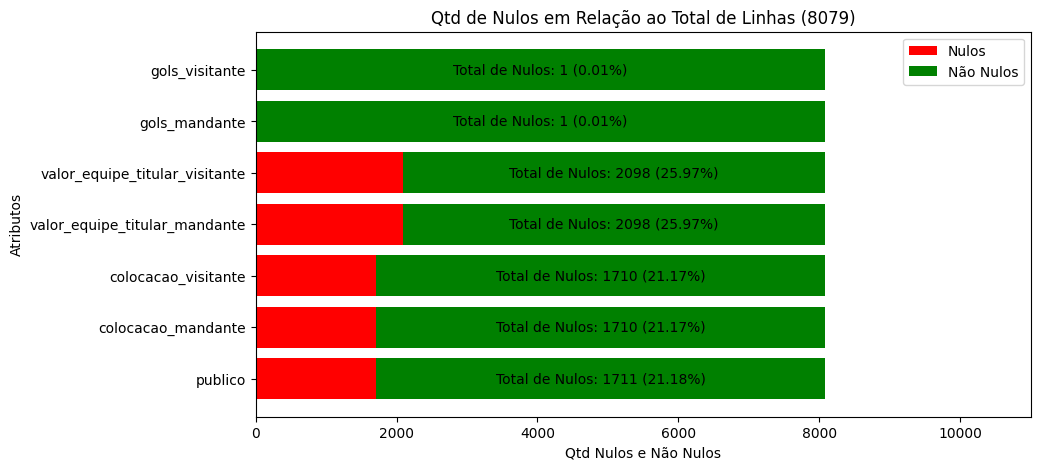

In [25]:
# VAMOS VISUALIZAR GRAFICAMENTE A PORCENTAGEM DE NULOS
# COM A BIBLIOTECA MATPLOTLIB

# Pegando somente as colunas que possuem dados nulos
df_nulos = df_nulos[df_nulos['Quantidade_Nulos'] > 0]

# Tamanho do Gráfico
plt.figure(figsize=(10,5))

#Criando as barras
bar1 = plt.barh(df_nulos.Variável, df_nulos.Quantidade_Nulos, color = 'red')
bar2 = plt.barh(df_nulos.Variável, df_nulos.Quantidade_Não_Nulos, color = 'green', left = df_nulos.Quantidade_Nulos )

# Isso é para colocar labels com os valores nas barras
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html
#plt.bar_label(bar1, df_nulos.Label_Nulos, label_type = 'center' )
plt.bar_label(bar2, df_nulos.Label_Nulos, label_type = 'center')


# Adicionando legendas
plt.ylabel('Atributos')
plt.xlabel('Qtd Nulos e Não Nulos')
plt.title('Qtd de Nulos em Relação ao Total de Linhas ({})'.format(df_brasileirao.shape[0]))
plt.legend(('Nulos', 'Não Nulos'))

plt.xlim(right = 11000) # aumentando o limite do exio x,para a legenda não ficar em cima do gráfico


#plt.axvline(x = len(df_brasileirao), color = 'b', label = 'axvline - full height')

# Rotacionando rotulos do eixo X
#plt.xticks(rotation=40)

plt.show()

In [26]:
#missing.matrix(df_brasileirao, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False);

#### Verificamos quais são os atributos que contem dados nulos
#### Agora vamos tratar um por um

#### Iniciando por gols_mandante e gols_visitante (esses atributos tem apenas 1 dado nulo)

In [27]:
# gols_visitante e gols_mandante
# Esses atributos tem somente 1 dado nulo. Vamos ver que linha é
df_brasileirao[df_brasileirao['gols_visitante'].isna()]

,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
803,2016,2016-12-11,38,NaN,Chapecoense,Atlético-MG,9.0,4.0,NaN,NaN,NaN,NaN


In [28]:
# Verifica-se que a linha onde ambos os atributos (gols_visitante e gols_mandante) estão nulos
# Refere-se a um jogo que não aconteceu, em virtude do acidente aéreo da Chapecoense
# Então iremos eliminar essa linha
df_brasileirao.dropna(subset = ['gols_visitante', 'gols_mandante'], inplace = True) # dropa as linhas cujas colunas do subset são nulas (pelo menos uma)


# Visualizando as varáiveis que tem dados nulos, e suas quantidades
df_brasileirao.isnull().sum()

ano_campeonato                       0
data                                 0
rodada                               0
publico                           1710
time_mandante                        0
time_visitante                       0
colocacao_mandante                1710
colocacao_visitante               1710
valor_equipe_titular_mandante     2097
valor_equipe_titular_visitante    2097
gols_mandante                        0
gols_visitante                       0
dtype: int64

#### Tratando nulos de valor_equipe_titular_mandante valor_equipe_titular_visitante
#### Cada um está nulo em 2097 linhas

In [29]:
# Vamo ver as linhas onde valor_equipe_titular_mandante valor_equipe_titular_visitante são nulos
df_nulos = df_brasileirao[df_brasileirao['valor_equipe_titular_mandante'].isna() | df_brasileirao['valor_equipe_titular_visitante'].isna()] # | or

#df  = df.groupby(['ano_campeonato']).count()['rodada']

df_nulos

,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
36,2017,2017-06-06,4,13364.0,EC Bahia,Atlético-GO,13.0,20.0,NaN,NaN,3.0,0.0
37,2017,2017-06-09,5,18917.0,EC Bahia,Cruzeiro,9.0,8.0,NaN,NaN,1.0,0.0
38,2017,2017-06-18,8,33621.0,EC Bahia,Palmeiras,6.0,15.0,NaN,NaN,2.0,4.0
39,2017,2017-06-25,10,21929.0,EC Bahia,Flamengo,15.0,6.0,NaN,NaN,0.0,1.0
40,2017,2017-07-09,12,18267.0,EC Bahia,Fluminense,16.0,6.0,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7947,2011,2011-11-20,36,7840.0,Botafogo,Internacional,6.0,7.0,NaN,NaN,1.0,2.0
8058,2011,2011-08-06,15,15689.0,Atlético-MG,Figueirense FC,16.0,9.0,NaN,NaN,1.0,2.0
8059,2011,2011-08-31,20,14738.0,Cruzeiro,Figueirense FC,7.0,10.0,NaN,NaN,2.0,4.0
8060,2011,2011-09-24,26,7059.0,Santos,Figueirense FC,8.0,12.0,NaN,NaN,2.0,3.0


In [30]:
# Verificamos que os todas as ocorrências de nulos dos dois, estão em linhas comuns
# Veja consulta acima com or (|) apresenta 2097 linhas onde ambos estão nulos

# Primeiramente vamos verificar em que anos são essas ocorrências
# Criamos um DF com uma coluna com o total de rodadas disponíveis no dataset, fando um groupby, e já renoeamos a coluna
df_count_nulos = pd.DataFrame( df_brasileirao.groupby(['ano_campeonato']).count() )[['rodada']].rename(columns={'rodada': 'qtd_rodadas'})

#criamos mais 3 colunas com totais de rodadas onde os dados são nulos
df_count_nulos['qtd_rodadas_valor_equipe_nulo'] = df_nulos.groupby(['ano_campeonato']).count()['rodada']
df_count_nulos['qtd_rodadas_valor_equipe_não_nulo'] = df_count_nulos['qtd_rodadas'] - df_count_nulos['qtd_rodadas_valor_equipe_nulo']
df_count_nulos['percentual_nulo'] = ( df_count_nulos['qtd_rodadas_valor_equipe_nulo']  / df_count_nulos['qtd_rodadas']) * 100

#dropamos linhas com totais nulos. Essas significam anos em que não há dados nulos
df_count_nulos = df_count_nulos.dropna()

df_count_nulos
#df.groupby(['ano_campeonato']).count()

,qtd_rodadas,qtd_rodadas_valor_equipe_nulo,qtd_rodadas_valor_equipe_não_nulo,percentual_nulo
ano_campeonato,,,,
2003,456,456.0,0.0,100.000000
2004,456,456.0,0.0,100.000000
2005,418,418.0,0.0,100.000000
2006,380,380.0,0.0,100.000000
2007,380,92.0,288.0,24.210526
2008,380,4.0,376.0,1.052632
2009,380,40.0,340.0,10.526316
2010,380,45.0,335.0,11.842105
2011,380,71.0,309.0,18.684211


### No DF acima, temos o total geral de rodadas e totais de rodadas com valores nulos por ano
#### Os anos de 2003, 2004, 2005 e 2006 possuem 100% de dados nulos, o tornará o preenchimento um pouco mais difícil de se estimar, podendo até decidir pela exclusão das linhas desses anos.

#### Então vamos iniciar pelo preenchimento dos demais anos, onde procederemos de forma análoga ao já feito para preenchimento desses mesmos atributo do dataset menor(df_brasileirao_comp), onde decidimos preencher esses valores pela média do ano

In [31]:
# Apenas para dar uma olhadinha nos valores da média e mediana de cada time, fazendo um groupby
# Variar ano a ano para analisar as médias e medianas
df_brasileirao_so_ano = df_brasileirao[df_brasileirao['ano_campeonato'] == 2009 ].groupby('time_mandante').aggregate({'valor_equipe_titular_mandante': ['mean','median']})
df_brasileirao_so_ano.columns = ['_'.join(col) for col in df_brasileirao_so_ano.columns.values] # para dar um flatten na coluna multiIndex- ['valor_equipe_titular_mandante']['mean'] vira ['valor_equipe_titular_mandante_mean']

df_brasileirao_so_ano['valor_equipe_titular_mandante_mean'] = df_brasileirao_so_ano['valor_equipe_titular_mandante_mean'].round(2) # estava aparecendo em notação científica, então limitamos as casas decimais

df_brasileirao_so_ano

,valor_equipe_titular_mandante_mean,valor_equipe_titular_mandante_median
time_mandante,,
Athletico-PR,8776470.59,8650000.0
Atlético-MG,12622222.22,12000000.0
Avaí FC,4851666.67,4675000.0
Barueri,5227777.78,5800000.0
Botafogo,7780555.56,7675000.0
Corinthians,21808333.33,23350000.0
Coritiba FC,10850000.00,11075000.0
Cruzeiro,19277777.78,19875000.0
EC Vitória,7938888.89,7825000.0


In [32]:
#df_count_nulos[4:]
#df_count_nulos[4:].index
#for ano in df_count_nulos[4:].index:
#  print(ano)

In [33]:
# Verificamos que os valores não são muito divergentes (indicando a não exsitência de outliers)
# Então optamos por usar a média para preenchimento dos valores faltantes, como fizemos no dataset menor

# Vamos linha por linha do dataset, preenchendo os atributos valor_equipe_titular_mandante e valor_equipe_titular_visitante
# com as médias calculadas de cada time (ano a ano)
#for index in range(len(df_brasileirao_comp)):
df_brasileirao2 = df_brasileirao.copy() #só para testar. depois usamo o df_brasileirao diretamente

#Antes
display(df_brasileirao2[(df_brasileirao2['ano_campeonato'] == 2007) & (df_brasileirao2['time_mandante'] == 'Flamengo') ].isnull().sum())
print()

for ano in df_count_nulos[4:].index: # para não incluir as 4 primrias linhas (100% nulos)
  #df_brasileirao_so_ano = df_brasileirao2[df_brasileirao2['ano_campeonato'] == ano ] # pega um DF só daquel ano

  #print('ANO:', ano)
  df_brasileirao_so_ano = pd.DataFrame(df_brasileirao2[df_brasileirao2['ano_campeonato'] == ano ])

  '''
  #df_times_ano = pd.DataFrame( df_brasileirao_so_ano['time_mandante'].drop_duplicates() ) # os mandantes são os mesmo times que são visitantes. então basta esse

  #só os nulos para o laço
  df_nulos_ano = df_brasileirao_so_ano[df_brasileirao_so_ano['valor_equipe_titular_mandante'].isna() | df_brasileirao_so_ano['valor_equipe_titular_visitante'].isna()] # | or

  print('ANO: ', ano)
  display(df_nulos_ano.shape)
  print()

  for index in df_nulos_ano.index:
    #print(time)

    #VAMOS TER QUE PREENCHER UM A UM MESMO (SEM O FILLNA), devido as muitas condições de fltro (ano e time). NO ENTANTO, AQUI SÓ OS NULOS DEVEM SER PREENCHIDOS
    #ENTÃO TEM QUE TER ESSE CUIDADO ESPECIAL. NO DATASET MENOR QUE FIZEMOS ANTES, TODAS AS LINHAS SERIAM PREENCHIDAS (TODAS ESTAVMA NULAS)

    time_mand = df_nulos_ano.loc[index, 'time_mandante']
    #df_brasileirao2[(df_brasileirao2['ano_campeonato'] == ano) & (df_brasileirao2['time_mandante'] == time) & (df_brasileirao2['valor_equipe_titular_mandante'].isna())].valor_equipe_titular_mandante.fillna( df_brasileirao_so_ano[df_brasileirao_so_ano['time_mandante'] == time]['valor_equipe_titular_mandante'].mean() )
    df_brasileirao2.loc[index, 'valor_equipe_titular_mandante'] = df_brasileirao_so_ano[df_brasileirao_so_ano['time_mandante'] == time_mand]['valor_equipe_titular_mandante'].mean()

    time_visit = df_brasileirao_so_ano.loc[index, 'time_visitante']
    #df_brasileirao2[(df_brasileirao2['ano_campeonato'] == ano) & (df_brasileirao2['time_visitante'] == time) & (df_brasileirao2['valor_equipe_titular_visitante'].isna())].valor_equipe_titular_visitante.fillna( df_brasileirao_so_ano[df_brasileirao_so_ano['time_visitante'] == time]['valor_equipe_titular_visitante'].mean() )
    df_brasileirao2.loc[index, 'valor_equipe_titular_visitante'] = df_brasileirao_so_ano[df_brasileirao_so_ano['time_visitante'] == time_visit]['valor_equipe_titular_visitante'].mean()
    '''

  df_times_ano = pd.DataFrame( df_brasileirao_so_ano['time_mandante'].drop_duplicates() ) # os mandantes são os mesmo times que são visitantes. então basta esse

  print('ANO: ', ano)
  #display(df_times_ano.shape)
  #display(df_times_ano)
  print()

  for index in df_times_ano.index:
    #print(time)

    #VAMOS TER QUE PREENCHER UM A UM MESMO (SEM O FILLNA), devido as muitas condições de fltro (ano e time). NO ENTANTO, AQUI SÓ OS NULOS DEVEM SER PREENCHIDOS
    #ENTÃO TEM QUE TER ESSE CUIDADO ESPECIAL. NO DATASET MENOR QUE FIZEMOS ANTES, TODAS AS LINHAS SERIAM PREENCHIDAS (TODAS ESTAVMA NULAS)

    time = df_times_ano.loc[index, 'time_mandante']
    df_brasileirao2.loc[(df_brasileirao2['ano_campeonato'] == ano) & (df_brasileirao2['time_mandante'] == time) & (df_brasileirao2['valor_equipe_titular_mandante'].isna()),'valor_equipe_titular_mandante'] = df_brasileirao_so_ano[df_brasileirao_so_ano['time_mandante'] == time]['valor_equipe_titular_mandante'].mean()
    df_brasileirao2.loc[(df_brasileirao2['ano_campeonato'] == ano) & (df_brasileirao2['time_visitante'] == time) & (df_brasileirao2['valor_equipe_titular_visitante'].isna()),'valor_equipe_titular_visitante'] = df_brasileirao_so_ano[df_brasileirao_so_ano['time_visitante'] == time]['valor_equipe_titular_visitante'].mean()


# mostramos o DF para conferência
display(df_brasileirao2[(df_brasileirao2['ano_campeonato'] == 2007) & (df_brasileirao2['time_mandante'] == 'Flamengo') ].isnull().sum())
print()
display(df_brasileirao2[(df_brasileirao2['ano_campeonato'] == 2007) & (df_brasileirao2['time_mandante'] == 'Flamengo') ])

ano_campeonato                    0
data                              0
rodada                            0
publico                           0
time_mandante                     0
time_visitante                    0
colocacao_mandante                0
colocacao_visitante               0
valor_equipe_titular_mandante     3
valor_equipe_titular_visitante    3
gols_mandante                     0
gols_visitante                    0
dtype: int64


ANO:  2007

ANO:  2008

ANO:  2009

ANO:  2010

ANO:  2011

ANO:  2012

ANO:  2013

ANO:  2015

ANO:  2016

ANO:  2017

ANO:  2018

ANO:  2020



ano_campeonato                    0
data                              0
rodada                            0
publico                           0
time_mandante                     0
time_visitante                    0
colocacao_mandante                0
colocacao_visitante               0
valor_equipe_titular_mandante     0
valor_equipe_titular_visitante    1
gols_mandante                     0
gols_visitante                    0
dtype: int64

,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
1562,2007,2007-07-20,12,45000.0,Flamengo,Paraná,7.0,10.0,1750000.0,6.000000e+05,1.0,2.0
1739,2007,2007-08-11,19,34457.0,Flamengo,Náutico,11.0,18.0,9631250.0,1.373333e+06,2.0,1.0
1740,2007,2007-08-26,21,52106.0,Flamengo,Goiás,11.0,8.0,9631250.0,1.958333e+06,3.0,1.0
1753,2007,2007-05-03,1,7801.0,Flamengo,Palmeiras,16.0,4.0,550000.0,3.750000e+06,2.0,4.0
1754,2007,2007-05-27,3,12321.0,Flamengo,Botafogo,9.0,6.0,500000.0,3.000000e+05,2.0,2.0
1755,2007,2007-06-17,6,15358.0,Flamengo,Internacional,16.0,13.0,1400000.0,5.750000e+06,2.0,2.0
1756,2007,2007-08-23,8,16845.0,Flamengo,Juventude,12.0,15.0,10450000.0,1.250000e+06,4.0,0.0
1757,2007,2007-09-13,16,11640.0,Flamengo,Cruzeiro,12.0,5.0,12450000.0,3.400000e+06,3.0,1.0
1758,2007,2007-09-01,23,51552.0,Flamengo,Sport Recife,9.0,10.0,17200000.0,1.550000e+06,1.0,1.0
1759,2007,2007-09-05,24,11263.0,Flamengo,Figueirense FC,9.0,15.0,12750000.0,5.000000e+04,4.0,1.0


In [34]:
df_brasileirao2.isnull().sum()

ano_campeonato                       0
data                                 0
rodada                               0
publico                           1710
time_mandante                        0
time_visitante                       0
colocacao_mandante                1710
colocacao_visitante               1710
valor_equipe_titular_mandante     1748
valor_equipe_titular_visitante    1748
gols_mandante                        0
gols_visitante                       0
dtype: int64

In [35]:
## VAMOS VER SE TODOS OS NULOS FORAM PREENCHIDOS DOS ANOS 2007 PARA FRENTE (QUE FOI O QUE FIZEMOS)

# Vamo ver as linhas onde valor_equipe_titular_mandante valor_equipe_titular_visitante são nulos
df_nulos = df_brasileirao2[df_brasileirao2['valor_equipe_titular_mandante'].isna() | df_brasileirao2['valor_equipe_titular_visitante'].isna()] # | or

# Primeiramente vamos verificar em que anos são essas ocorrências
# Criamos um DF com uma coluna com o total de rodadas disponíveis no dataset, fando um groupby, e já renoeamos a coluna
df_count_nulos = pd.DataFrame( df_brasileirao2.groupby(['ano_campeonato']).count() )[['rodada']].rename(columns={'rodada': 'qtd_rodadas'})

#criamos mais 3 colunas com totais de rodadas onde os dados são nulos
df_count_nulos['qtd_rodadas_valor_equipe_nulo'] = df_nulos.groupby(['ano_campeonato']).count()['rodada']
df_count_nulos['qtd_rodadas_valor_equipe_não_nulo'] = df_count_nulos['qtd_rodadas'] - df_count_nulos['qtd_rodadas_valor_equipe_nulo']
df_count_nulos['percentual_nulo'] = ( df_count_nulos['qtd_rodadas_valor_equipe_nulo']  / df_count_nulos['qtd_rodadas']) * 100

#dropamos inhas com totais nulos. Essas significam anos em que não há dados nulos
df_count_nulos = df_count_nulos.dropna()

df_count_nulos
#df.groupby(['ano_campeonato']).count()

,qtd_rodadas,qtd_rodadas_valor_equipe_nulo,qtd_rodadas_valor_equipe_não_nulo,percentual_nulo
ano_campeonato,,,,
2003,456,456.0,0.0,100.0
2004,456,456.0,0.0,100.0
2005,418,418.0,0.0,100.0
2006,380,380.0,0.0,100.0
2007,380,38.0,342.0,10.0
2011,380,38.0,342.0,10.0


In [36]:
## VERIFICA-SE QUE AINDA RESTARAM 38 LINHAS COM VALORES NULOS DOS ATRIBUTOS QUE ESTAMOS TRATANDO NOS ANOS 2007 E 2011
## VAMOS INVESTIGAR MELHOR ESSES DOIS ANOS


## ANO 2007
df_brasileirao2[(df_brasileirao2['ano_campeonato'] == 2007) & ( (df_brasileirao2['valor_equipe_titular_visitante'].isna()) | (df_brasileirao2['valor_equipe_titular_mandante'].isna()) )]

,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
1561,2007,2007-08-02,16,13314.0,Botafogo,América-RN,1.0,20.0,5.937500e+06,NaN,4.0,2.0
1569,2007,2007-07-04,9,13049.0,Palmeiras,América-RN,13.0,20.0,6.919444e+06,NaN,2.0,0.0
1593,2007,2007-10-21,32,14912.0,Athletico-PR,América-RN,12.0,20.0,2.600000e+06,NaN,2.0,0.0
1605,2007,2007-10-07,30,14508.0,Internacional,América-RN,13.0,20.0,8.840000e+06,NaN,2.0,0.0
1622,2007,2007-06-03,4,4038.0,Juventude,América-RN,19.0,14.0,6.937500e+05,NaN,3.0,0.0
1640,2007,2007-08-19,20,23000.0,Vasco da Gama,América-RN,4.0,20.0,2.227778e+06,NaN,2.0,0.0
1656,2007,2007-05-20,2,3093.0,Santos,América-RN,19.0,14.0,9.096875e+06,NaN,2.0,3.0
1677,2007,2007-08-29,22,3752.0,Figueirense FC,América-RN,16.0,20.0,3.637500e+06,NaN,3.0,1.0
1695,2007,2007-08-10,18,12244.0,Grêmio,América-RN,8.0,20.0,1.005588e+07,NaN,3.0,0.0
1714,2007,2007-07-07,10,3790.0,Paraná,América-RN,4.0,20.0,3.513333e+06,NaN,0.0,1.0


In [37]:
## NO ANO 2007 (DF ACIMA) PERCEBE-SE QUE TODOS OS VALORES NULOD REFEREM-SE AO TIME AMÉRICA-RN, EM TODOS OS SEUS 38 JOGOS (19 MANDANTE E 19 VISITANTE)
## LOGO, CONCLUI-SE QUE OS DADOS NÃO FORAM PREENCHIDOS JUSTAMENTE DEVIDO A ESTE CLUBE TER 100% DE DADOS NULOS NESSES ATRIBUTOS,
## IMPOSSIBILITANDO O CÁLCULO DA MÉDIA PARA PREENCHIMENTO
## VERIFICANDO A TABELA DO CAMPEONATO DE 2007 (srgool.br), CONSTATA-SE QUE O TIME AMÉRICA-RN FOI O ÚTLIMO COLOCADO
## PODEMOS INTUIR TAMBÉM QUE O TIME POSSUI VALOR PEQUENO, PROVAVELMENTE O MENOR DENTRE TODOS DAQUELE CAMPEONATO
## ASSIM, ENTEDEMOS QUE PODEMOS PREENCHER ESSES DADOS COM O MENOR VALOR ENCONTRADO NAQUELE ANO (2007)
## É O QUE VAMOS FAZER A SEGUIR


#mandante
min_value = df_brasileirao2[(df_brasileirao2['ano_campeonato'] == 2007)]['valor_equipe_titular_mandante'].min()
df_brasileirao2.loc[(df_brasileirao2['ano_campeonato'] == 2007) & (df_brasileirao2['time_mandante'] == 'América-RN'),'valor_equipe_titular_mandante'] = min_value     #.fillna(min_value, inplace = True)

#visitante
min_value = df_brasileirao2[(df_brasileirao2['ano_campeonato'] == 2007)]['valor_equipe_titular_visitante'].min()
df_brasileirao2.loc[(df_brasileirao2['ano_campeonato'] == 2007) & (df_brasileirao2['time_visitante'] == 'América-RN'),'valor_equipe_titular_visitante'] = min_value  #.fillna(min_value, inplace = True)

## E MOSTRAMOS DE NOVO O DF DO ANO 2007
df_brasileirao2[(df_brasileirao2['ano_campeonato'] == 2007) & ( (df_brasileirao2['time_mandante'] == 'América-RN') | (df_brasileirao2['time_visitante'] == 'América-RN') )]

,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
1561,2007,2007-08-02,16,13314.0,Botafogo,América-RN,1.0,20.0,5.937500e+06,5.000000e+04,4.0,2.0
1569,2007,2007-07-04,9,13049.0,Palmeiras,América-RN,13.0,20.0,6.919444e+06,5.000000e+04,2.0,0.0
1593,2007,2007-10-21,32,14912.0,Athletico-PR,América-RN,12.0,20.0,2.600000e+06,5.000000e+04,2.0,0.0
1605,2007,2007-10-07,30,14508.0,Internacional,América-RN,13.0,20.0,8.840000e+06,5.000000e+04,2.0,0.0
1622,2007,2007-06-03,4,4038.0,Juventude,América-RN,19.0,14.0,6.937500e+05,5.000000e+04,3.0,0.0
1640,2007,2007-08-19,20,23000.0,Vasco da Gama,América-RN,4.0,20.0,2.227778e+06,5.000000e+04,2.0,0.0
1656,2007,2007-05-20,2,3093.0,Santos,América-RN,19.0,14.0,9.096875e+06,5.000000e+04,2.0,3.0
1677,2007,2007-08-29,22,3752.0,Figueirense FC,América-RN,16.0,20.0,3.637500e+06,5.000000e+04,3.0,1.0
1695,2007,2007-08-10,18,12244.0,Grêmio,América-RN,8.0,20.0,1.005588e+07,5.000000e+04,3.0,0.0
1714,2007,2007-07-07,10,3790.0,Paraná,América-RN,4.0,20.0,3.513333e+06,5.000000e+04,0.0,1.0


In [38]:
### VAMOS OLHAR AGORA O ANO DE 2011
df_brasileirao2[(df_brasileirao2['ano_campeonato'] == 2011) & ( (df_brasileirao2['valor_equipe_titular_visitante'].isna()) | (df_brasileirao2['valor_equipe_titular_mandante'].isna()) )]

,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
7700,2011,2011-05-22,1,10231.0,Figueirense FC,Cruzeiro,8.0,15.0,NaN,1.836786e+07,1.0,0.0
7701,2011,2011-05-28,2,9931.0,São Paulo,Figueirense FC,4.0,8.0,3.240000e+07,NaN,1.0,0.0
7703,2011,2011-06-04,3,6913.0,Figueirense FC,Atlético-GO,9.0,10.0,NaN,5.465625e+06,2.0,0.0
7705,2011,2011-06-11,4,17777.0,Vasco da Gama,Figueirense FC,7.0,6.0,1.547222e+07,NaN,1.0,1.0
7707,2011,2011-06-19,5,10067.0,Figueirense FC,Athletico-PR,6.0,19.0,NaN,7.960000e+06,2.0,0.0
7708,2011,2011-06-26,6,10455.0,Internacional,Figueirense FC,11.0,4.0,2.041562e+07,NaN,4.0,1.0
7711,2011,2011-07-07,8,17464.0,Coritiba FC,Figueirense FC,15.0,6.0,4.915625e+06,NaN,3.0,0.0
7714,2011,2011-07-20,10,12175.0,Figueirense FC,Grêmio,8.0,12.0,NaN,2.066944e+07,0.0,0.0
7716,2011,2011-07-23,11,752.0,América-MG,Figueirense FC,19.0,10.0,3.102778e+06,NaN,0.0,0.0
7717,2011,2011-07-27,12,13283.0,Figueirense FC,Palmeiras,9.0,5.0,NaN,1.609706e+07,0.0,1.0


In [39]:
## NO ANO 2011 (DF ACIMA) PERCEBE-SE QUE TODOS OS VALORES NULOS REFEREM-SE AO TIME Figueirense FC, EM TODOS OS SEUS 38 JOGOS (19 MANDANTE E 19 VISITANTE)
## LOGO, CONCLUI-SE QUE OS DADOS NÃO FORAM PREENCHIDOS JUSTAMENTE DEVIDO A ESTE CLUBE TER 100% DE DADOS NULOS NESSES ATRIBUTOS,
## IMPOSSIBILITANDO O CÁLCULO DA MÉDIA PARA PREENCHIMENTO
## VERIFICANDO A TABELA DO CAMPEONATO DE 2011 (srgool.br), CONSTATA-SE QUE O TIME Figueirense FC FICOU EM 7º LUGAR
## VAMOS OLHAR A MÉDIA DE VALOR NO CAMPEONATO, DE CADA TIME DAQUELE ANO

# Criamos um DF com a média do valor mandante, e eme seguida fazemos um merge (concat, axis =1) com a média do valor visitante
df_brasileirao_2011 = df_brasileirao2[df_brasileirao2['ano_campeonato'] == 2011 ].groupby('time_mandante').aggregate({'valor_equipe_titular_mandante': ['mean']})
df_brasileirao_2011 = pd.concat([df_brasileirao_2011, df_brasileirao2[df_brasileirao2['ano_campeonato'] == 2011 ].groupby('time_visitante').aggregate({'valor_equipe_titular_visitante': ['mean']})], axis = 1)

df_brasileirao_2011.columns = ['_'.join(col) for col in df_brasileirao_2011.columns.values] # para dar um flatten na coluna multiIndex- ['valor_equipe_titular_mandante']['mean'] vira ['valor_equipe_titular_mandante_mean']

#df_brasileirao_2011['valor_equipe_titular_mandante_mean'] = df_brasileirao_2011['valor_equipe_titular_mandante_mean'].round(2) # estava aparecendo em notação científica, então limitamos as casas decimais
df_brasileirao_2011 = df_brasileirao_2011.round(2) # Assim, faz para todos os atributos float

df_brasileirao_2011

,valor_equipe_titular_mandante_mean,valor_equipe_titular_visitante_mean
América-MG,3102777.78,3058823.53
Athletico-PR,8383333.33,7960000.00
Atlético-GO,5440000.00,5465625.00
Atlético-MG,12709375.00,12686111.11
Avaí FC,4426666.67,4270625.00
Botafogo,17803125.00,17694117.65
Ceará SC,4711764.71,4811111.11
Corinthians,20202941.18,20563888.89
Coritiba FC,4915625.00,4864705.88
Cruzeiro,19800000.00,18367857.14


In [40]:
### VAMOS OLHAR OS DF ORDENADOS POR CADA UM DOS ATRIBUTOS DE VALOR
display(df_brasileirao_2011[['valor_equipe_titular_mandante_mean']].sort_values('valor_equipe_titular_mandante_mean') ) #[:6]).mean())
print()
print()
display(df_brasileirao_2011[['valor_equipe_titular_visitante_mean']].sort_values('valor_equipe_titular_visitante_mean') ) #[:6]).mean())

,valor_equipe_titular_mandante_mean
América-MG,3102777.78
Avaí FC,4426666.67
Ceará SC,4711764.71
EC Bahia,4776470.59
Coritiba FC,4915625.00
Atlético-GO,5440000.00
Athletico-PR,8383333.33
Atlético-MG,12709375.00
Vasco da Gama,15472222.22
Palmeiras,16050000.00


,valor_equipe_titular_visitante_mean
América-MG,3058823.53
Avaí FC,4270625.00
Ceará SC,4811111.11
EC Bahia,4823529.41
Coritiba FC,4864705.88
Atlético-GO,5465625.00
Athletico-PR,7960000.00
Atlético-MG,12686111.11
Vasco da Gama,15100000.00
Palmeiras,16097058.82


In [41]:

## NESSE CASO, CONSIDERAMOS UMA BOA FORMA DE ESTIMAR O VALOR PARA PREENCHIMENTO,
## TIRANDO UMA MÉDIA DENTRE OS TIMES NÃO CONSIDERADOS GRANDES DAQUELE ANO (2011)
## PERCEBEMOS QUE ESTES TIMES SE CONCENTRAM ENTRE OS 6 MENORES ORÇAMENTOS DAQUELE ANO
## OS DEMAIS JÁ SÃO OS TIMES CONSIDERADOS "GRANDES" DO FUTEBOL BRASILEIRO, OS QUAIS POSSUEM MAIOR ORÇAMENTO
## ENTÃO VAMOS PREENCHER O FIGUEIRENSE COM ESSA MÉDIA


#mandante
mandante_value = df_brasileirao_2011.sort_values('valor_equipe_titular_mandante_mean')[:6].valor_equipe_titular_mandante_mean.mean()
print(mandante_value)
df_brasileirao2.loc[(df_brasileirao2['ano_campeonato'] == 2011) & (df_brasileirao2['time_mandante'] == 'Figueirense FC'),'valor_equipe_titular_mandante'] = mandante_value

#visitante
visitante_value = df_brasileirao_2011.sort_values('valor_equipe_titular_visitante_mean')[:6].valor_equipe_titular_visitante_mean.mean()
print(visitante_value)
df_brasileirao2.loc[(df_brasileirao2['ano_campeonato'] == 2011) & (df_brasileirao2['time_visitante'] == 'Figueirense FC'),'valor_equipe_titular_visitante'] = visitante_value

## E MOSTRAMOS DE NOVO O DF DO ANO 2011
df_brasileirao2[(df_brasileirao2['ano_campeonato'] == 2011) & ( (df_brasileirao2['time_mandante'] == 'Figueirense FC') | (df_brasileirao2['time_visitante'] == 'Figueirense FC') )]

4562217.458333333
4549069.988333333


,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
7700,2011,2011-05-22,1,10231.0,Figueirense FC,Cruzeiro,8.0,15.0,4.562217e+06,1.836786e+07,1.0,0.0
7701,2011,2011-05-28,2,9931.0,São Paulo,Figueirense FC,4.0,8.0,3.240000e+07,4.549070e+06,1.0,0.0
7703,2011,2011-06-04,3,6913.0,Figueirense FC,Atlético-GO,9.0,10.0,4.562217e+06,5.465625e+06,2.0,0.0
7705,2011,2011-06-11,4,17777.0,Vasco da Gama,Figueirense FC,7.0,6.0,1.547222e+07,4.549070e+06,1.0,1.0
7707,2011,2011-06-19,5,10067.0,Figueirense FC,Athletico-PR,6.0,19.0,4.562217e+06,7.960000e+06,2.0,0.0
7708,2011,2011-06-26,6,10455.0,Internacional,Figueirense FC,11.0,4.0,2.041562e+07,4.549070e+06,4.0,1.0
7711,2011,2011-07-07,8,17464.0,Coritiba FC,Figueirense FC,15.0,6.0,4.915625e+06,4.549070e+06,3.0,0.0
7714,2011,2011-07-20,10,12175.0,Figueirense FC,Grêmio,8.0,12.0,4.562217e+06,2.066944e+07,0.0,0.0
7716,2011,2011-07-23,11,752.0,América-MG,Figueirense FC,19.0,10.0,3.102778e+06,4.549070e+06,0.0,0.0
7717,2011,2011-07-27,12,13283.0,Figueirense FC,Palmeiras,9.0,5.0,4.562217e+06,1.609706e+07,0.0,1.0


In [42]:
# OLHANDO NOVAMENTE A QUANTIDADE DE NULOS APÓS OS TRATA,ENTOS JÁ REALIZADOS
df_brasileirao2.isnull().sum()

ano_campeonato                       0
data                                 0
rodada                               0
publico                           1710
time_mandante                        0
time_visitante                       0
colocacao_mandante                1710
colocacao_visitante               1710
valor_equipe_titular_mandante     1710
valor_equipe_titular_visitante    1710
gols_mandante                        0
gols_visitante                       0
dtype: int64

In [43]:
## VAMOS VER NOVAMENTE POR ANO

# Vamo ver as linhas onde valor_equipe_titular_mandante valor_equipe_titular_visitante são nulos
df_nulos = df_brasileirao2[df_brasileirao2['valor_equipe_titular_mandante'].isna() | df_brasileirao2['valor_equipe_titular_visitante'].isna()] # | or

# Primeiramente vamos verificar em que anos são essas ocorrências
# Criamos um DF com uma coluna com o total de rodadas disponíveis no dataset, fando um groupby, e já renoeamos a coluna
df_count_nulos = pd.DataFrame( df_brasileirao2.groupby(['ano_campeonato']).count() )[['rodada']].rename(columns={'rodada': 'qtd_rodadas'})

#criamos mais 3 colunas com totais de rodadas onde os dados são nulos
df_count_nulos['qtd_rodadas_valor_equipe_nulo'] = df_nulos.groupby(['ano_campeonato']).count()['rodada']
df_count_nulos['qtd_rodadas_valor_equipe_não_nulo'] = df_count_nulos['qtd_rodadas'] - df_count_nulos['qtd_rodadas_valor_equipe_nulo']
df_count_nulos['percentual_nulo'] = ( df_count_nulos['qtd_rodadas_valor_equipe_nulo']  / df_count_nulos['qtd_rodadas']) * 100

#dropamos inhas com totais nulos. Essas significam anos em que não há dados nulos
df_count_nulos = df_count_nulos.dropna()

df_count_nulos
#df.groupby(['ano_campeonato']).count()

,qtd_rodadas,qtd_rodadas_valor_equipe_nulo,qtd_rodadas_valor_equipe_não_nulo,percentual_nulo
ano_campeonato,,,,
2003,456,456.0,0.0,100.0
2004,456,456.0,0.0,100.0
2005,418,418.0,0.0,100.0
2006,380,380.0,0.0,100.0


In [44]:
### OS NULOS QUE RESTARAM NESSES DOIS ATRIBUTOS SÃO REFERENTES EXCLUSIVAMENTE AOS ANOS DE 2003 A 2006
### ONDE JÁ VIMOS ANTES QUE ESTÃO COM 100% DE VALORES NULOS NESSES ATRIBUTOS.
### ASSIM, FICAMOS SEM NENHUMA REFERÊNCIA ACEITÁVEL PARA PREENCHER ESSES VALORES

In [45]:
# VAMOS OBSERVAR A QUANTIDADE E O PERCENTUAL DESSAS LINHAS EM RELAÇÃO AO NOSSO TOTAL DE LINHAS
# OBSERVA-SE QUE ALGNS ATRIBUTOS POSSUEM VALORES NULOS. COMO NOSSO DF AGORA TEM 8078 LINHAS, (EXCLUÍMOS AQUELA DO JOGO DA CHAPECOENSE NÃO REALIZADO EM 2016)
# VAMOS VER O PERCENTUAL DE NULOS DESSAS COLUNAS

# Para cada Variável no DF, iremos pegar a quantidade de dados nulos
# Iremos visualizar quantos nulos temos em cada variável
# Vamos criar uma tabela para visualizar isso (um Data Frame)
df_nulos = pd.DataFrame()
df_nulos['Variável'] = df_brasileirao2.columns

# Vamos colocar na outra coluna, a quantidade de nulos no DF
df_nulos['Quantidade_Não_Nulos'] = pd.Series()
df_nulos['Quantidade_Nulos'] = pd.Series()  #Uma coluna de um DF é um pd.Series(). Aqui criamos uma coluna vazia
df_nulos['Porcentagem_Nulos'] = pd.Series()
df_nulos['Label_Nulos'] = pd.Series() # Será usado no gráfico de barras, como label


for i in df_nulos.index:
    df_nulos.Quantidade_Nulos[i] = df_brasileirao2[df_nulos['Variável'][i]].isna().sum()
    df_nulos.Quantidade_Não_Nulos[i] = len(df_brasileirao2) - df_nulos.Quantidade_Nulos[i]
    df_nulos.Porcentagem_Nulos[i] = (df_brasileirao2[df_nulos['Variável'][i]].isna().sum()/len(df_brasileirao2))*100
    df_nulos.Label_Nulos[i] = 'Total de Nulos: {} ({:.2%})'.format(int(df_nulos.Quantidade_Nulos[i]), df_nulos.Porcentagem_Nulos[i]/100)

df_nulos

<ipython-input-45-da816afdb718>:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_nulos['Quantidade_Não_Nulos'] = pd.Series()
<ipython-input-45-da816afdb718>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_nulos['Quantidade_Nulos'] = pd.Series()  #Uma coluna de um DF é um pd.Series(). Aqui criamos uma coluna vazia
<ipython-input-45-da816afdb718>:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_nulos['Porcentagem_Nulos'] = pd.Series()
<ipython-input-45-da816afdb718>:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  

,Variável,Quantidade_Não_Nulos,Quantidade_Nulos,Porcentagem_Nulos,Label_Nulos
0,ano_campeonato,8078.0,0.0,0.000000,Total de Nulos: 0 (0.00%)
1,data,8078.0,0.0,0.000000,Total de Nulos: 0 (0.00%)
2,rodada,8078.0,0.0,0.000000,Total de Nulos: 0 (0.00%)
3,publico,6368.0,1710.0,21.168606,Total de Nulos: 1710 (21.17%)
4,time_mandante,8078.0,0.0,0.000000,Total de Nulos: 0 (0.00%)
5,time_visitante,8078.0,0.0,0.000000,Total de Nulos: 0 (0.00%)
6,colocacao_mandante,6368.0,1710.0,21.168606,Total de Nulos: 1710 (21.17%)
7,colocacao_visitante,6368.0,1710.0,21.168606,Total de Nulos: 1710 (21.17%)
8,valor_equipe_titular_mandante,6368.0,1710.0,21.168606,Total de Nulos: 1710 (21.17%)
9,valor_equipe_titular_visitante,6368.0,1710.0,21.168606,Total de Nulos: 1710 (21.17%)


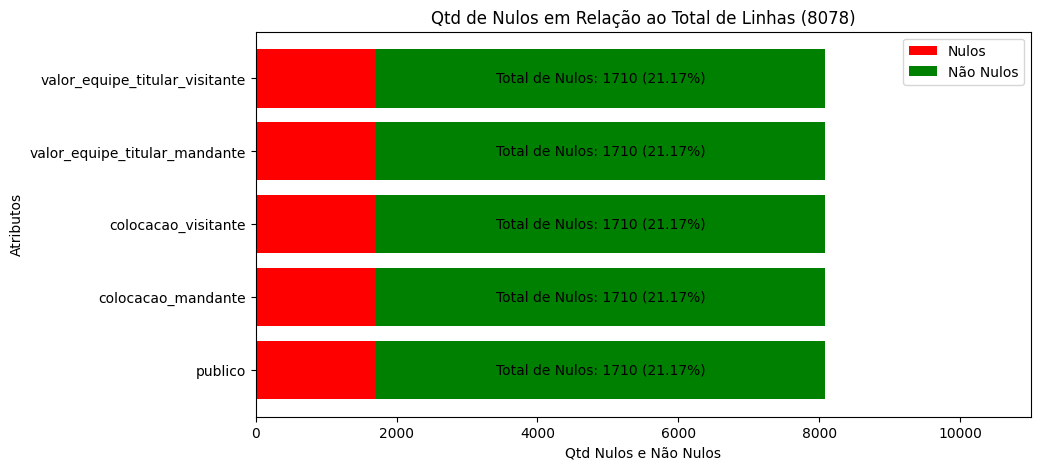

In [46]:
# VAMOS VISUALIZAR GRAFICAMENTE A PORCENTAGEM DE NULOS
# COM A BIBLIOTECA MATPLOTLIB

# Pegando somente as colunas que possuem dados nulos
df_nulos = df_nulos[df_nulos['Quantidade_Nulos'] > 0]

# Tamanho do Gráfico
plt.figure(figsize=(10,5))

#Criando as barras
bar1 = plt.barh(df_nulos.Variável, df_nulos.Quantidade_Nulos, color = 'red')
bar2 = plt.barh(df_nulos.Variável, df_nulos.Quantidade_Não_Nulos, color = 'green', left = df_nulos.Quantidade_Nulos )

# Isso é para colocar labels com os valores nas barras
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html
#plt.bar_label(bar1, df_nulos.Label_Nulos, label_type = 'center' )
plt.bar_label(bar2, df_nulos.Label_Nulos, label_type = 'center')


# Adicionando legendas
plt.ylabel('Atributos')
plt.xlabel('Qtd Nulos e Não Nulos')
plt.title('Qtd de Nulos em Relação ao Total de Linhas ({})'.format(df_brasileirao.shape[0]))
plt.legend(('Nulos', 'Não Nulos'))

plt.xlim(right = 11000) # aumentando o limite do exio x,para a legenda não ficar em cima do gráfico


#plt.axvline(x = len(df_brasileirao), color = 'b', label = 'axvline - full height')

# Rotacionando rotulos do eixo X
#plt.xticks(rotation=40)

plt.show()

In [47]:
### OLHANDO PARA OS NOSSOS ATRIBUTOS DE VALOR DA EQUIPE, VEMOS QUE REPRESENTAM 1710 LINHAS (21,17%) DO NOSSO DATASET
### AINDA É UM VALOR ACEITÁVEL PARA EXCLUSÃO. E NESSE CASO, NÃO TEMOS ALTERNATIVA, POIS NÃO TEMOS COMO CALCULAR UM VALOR ACEITÁVEL PARA PREENCHIMENTO
### OLHANDO PARA OS OUTROS ATRIBUTO QUE AINDA NÃO TRATAMOS, VEMOS QUE ESTES POSSUEM O MESMO NÚMERO DE NULOS QUE OS NOSSOS ATRIBUTOS
### POSSIVELMENTE ESTES TAMBÉM SÃO REFERENTES AS MESMAS LINHAS.

### ENTÃO VAMOS EXCLUIR AS LINHAS COM VALORES NULOS (CONSIDERANDO APENAS OS NOSSOS ATRIBUTOS DE VALOR)

df_brasileirao2.dropna(subset = ['valor_equipe_titular_mandante', 'valor_equipe_titular_visitante'], inplace = True) # dropa as linhas cujas colunas do subset são nulas (pelo menos uma)

## Visualzamo quantos nulos restaram na base
df_brasileirao2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6368 entries, 0 to 8078
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ano_campeonato                  6368 non-null   int64         
 1   data                            6368 non-null   datetime64[ns]
 2   rodada                          6368 non-null   int64         
 3   publico                         6368 non-null   float64       
 4   time_mandante                   6368 non-null   object        
 5   time_visitante                  6368 non-null   object        
 6   colocacao_mandante              6368 non-null   float64       
 7   colocacao_visitante             6368 non-null   float64       
 8   valor_equipe_titular_mandante   6368 non-null   float64       
 9   valor_equipe_titular_visitante  6368 non-null   float64       
 10  gols_mandante                   6368 non-null   float64       
 11  gols

In [48]:
### VISUALIZANDO MELHOR
# VAMOS OBSERVAR A QUANTIDADE E O PERCENTUAL DESSAS LINHAS EM RELAÇÃO AO NOSSO TOTAL DE LINHAS
# OBSERVA-SE QUE ALGNS ATRIBUTOS POSSUEM VALORES NULOS. COMO NOSSO DF AGORA TEM 8078 LINHAS, (EXCLUÍMOS AQUELA DO JOGO DA CHAPECOENSE NÃO REALIZADO EM 2016)
# VAMOS VER O PERCENTUAL DE NULOS DESSAS COLUNAS

# Para cada Variável no DF, iremos pegar a quantidade de dados nulos
# Iremos visualizar quantos nulos temos em cada variável
# Vamos criar uma tabela para visualizar isso (um Data Frame)
df_nulos = pd.DataFrame()
df_nulos['Variável'] = df_brasileirao2.columns

# Vamos colocar na outra coluna, a quantidade de nulos no DF
df_nulos['Quantidade_Não_Nulos'] = pd.Series()
df_nulos['Quantidade_Nulos'] = pd.Series()  #Uma coluna de um DF é um pd.Series(). Aqui criamos uma coluna vazia
df_nulos['Porcentagem_Nulos'] = pd.Series()
df_nulos['Label_Nulos'] = pd.Series() # Será usado no gráfico de barras, como label


for i in df_nulos.index:
    df_nulos.Quantidade_Nulos[i] = df_brasileirao2[df_nulos['Variável'][i]].isna().sum()
    df_nulos.Quantidade_Não_Nulos[i] = len(df_brasileirao2) - df_nulos.Quantidade_Nulos[i]
    df_nulos.Porcentagem_Nulos[i] = (df_brasileirao2[df_nulos['Variável'][i]].isna().sum()/len(df_brasileirao2))*100
    df_nulos.Label_Nulos[i] = 'Total de Nulos: {} ({:.2%})'.format(int(df_nulos.Quantidade_Nulos[i]), df_nulos.Porcentagem_Nulos[i]/100)

df_nulos

<ipython-input-48-18b6698edda1>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_nulos['Quantidade_Não_Nulos'] = pd.Series()
<ipython-input-48-18b6698edda1>:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_nulos['Quantidade_Nulos'] = pd.Series()  #Uma coluna de um DF é um pd.Series(). Aqui criamos uma coluna vazia
<ipython-input-48-18b6698edda1>:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_nulos['Porcentagem_Nulos'] = pd.Series()
<ipython-input-48-18b6698edda1>:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  

,Variável,Quantidade_Não_Nulos,Quantidade_Nulos,Porcentagem_Nulos,Label_Nulos
0,ano_campeonato,6368.0,0.0,0.0,Total de Nulos: 0 (0.00%)
1,data,6368.0,0.0,0.0,Total de Nulos: 0 (0.00%)
2,rodada,6368.0,0.0,0.0,Total de Nulos: 0 (0.00%)
3,publico,6368.0,0.0,0.0,Total de Nulos: 0 (0.00%)
4,time_mandante,6368.0,0.0,0.0,Total de Nulos: 0 (0.00%)
5,time_visitante,6368.0,0.0,0.0,Total de Nulos: 0 (0.00%)
6,colocacao_mandante,6368.0,0.0,0.0,Total de Nulos: 0 (0.00%)
7,colocacao_visitante,6368.0,0.0,0.0,Total de Nulos: 0 (0.00%)
8,valor_equipe_titular_mandante,6368.0,0.0,0.0,Total de Nulos: 0 (0.00%)
9,valor_equipe_titular_visitante,6368.0,0.0,0.0,Total de Nulos: 0 (0.00%)


In [49]:
### ACIMA CONFIRMAMOS QUE NENHUM DADOS NULO MAIS ESTÁ PRESENTE EM NOSSA BASE.
### ENTÃO VAMOS MESCLAS OS NOSSOS 2 DATASETS, O MAIOR E O MENOR(DADOS COMPLEMENTARES PREENCHIDOS POR NÓS)

df_brasileirao = pd.concat([df_brasileirao2, df_brasileirao_comp]).sort_values(['ano_campeonato', 'rodada']).reset_index().drop(columns = ['index'])

df_brasileirao.shape

(6459, 12)

In [50]:
### ENCERRAMOS O PREENCHIMENTO DE DADOS NULOS
### TEMOS O NOSSO DATASET COM 6.459 LINHAS E 12 COLUNAS

# VAMOS VISUALIZAR O NOSSO DATASET COMPLETO
#df_brasileirao.tail()
df_brasileirao

,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
0,2007,2007-05-03,1,11870.0,Internacional,Botafogo,12.0,6.0,8.840000e+06,3.367857e+06,2.0,3.0
1,2007,2007-05-03,1,6222.0,Figueirense FC,Athletico-PR,18.0,1.0,3.637500e+06,2.804545e+06,3.0,6.0
2,2007,2007-05-03,1,3568.0,Paraná,Grêmio,3.0,20.0,1.000000e+06,1.500000e+06,3.0,0.0
3,2007,2007-05-03,1,7801.0,Flamengo,Palmeiras,16.0,4.0,5.500000e+05,3.750000e+06,2.0,4.0
4,2007,2007-05-03,1,12132.0,Fluminense,Cruzeiro,11.0,10.0,7.200000e+06,5.750000e+06,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6454,2023,2023-12-06,38,37724.0,Cruzeiro,Palmeiras,14.0,1.0,1.955333e+03,7.303333e+03,1.0,1.0
6455,2023,2023-12-06,38,27844.0,Internacional,Botafogo,9.0,5.0,3.450714e+03,2.481429e+03,3.0,1.0
6456,2023,2023-12-06,38,0.0,Coritiba FC,Corinthians,19.0,13.0,1.681786e+03,4.425667e+03,0.0,2.0
6457,2023,2023-12-06,38,27743.0,EC Bahia,Atlético-MG,16.0,3.0,2.451071e+03,4.275667e+03,4.0,1.0


In [51]:
df_brasileirao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6459 entries, 0 to 6458
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ano_campeonato                  6459 non-null   int64         
 1   data                            6459 non-null   datetime64[ns]
 2   rodada                          6459 non-null   int64         
 3   publico                         6459 non-null   float64       
 4   time_mandante                   6459 non-null   object        
 5   time_visitante                  6459 non-null   object        
 6   colocacao_mandante              6459 non-null   float64       
 7   colocacao_visitante             6459 non-null   float64       
 8   valor_equipe_titular_mandante   6459 non-null   float64       
 9   valor_equipe_titular_visitante  6459 non-null   float64       
 10  gols_mandante                   6459 non-null   float64       
 11  gols

## ANÁLISE DE CORRELAÇÃO

In [52]:
# VERIFICANDO A CORRELAÇÃO DAS FEATURES(COLUNAS)
print(df_brasileirao.corr())

                                ano_campeonato    rodada   publico  \
ano_campeonato                        1.000000 -0.000053  0.068886   
rodada                               -0.000053  1.000000  0.112481   
publico                               0.068886  0.112481  1.000000   
colocacao_mandante                   -0.008738 -0.005679 -0.303640   
colocacao_visitante                   0.008763  0.006028 -0.071210   
valor_equipe_titular_mandante         0.168656  0.025790  0.229428   
valor_equipe_titular_visitante        0.155280  0.021487  0.044686   
gols_mandante                        -0.089587  0.013587  0.037117   
gols_visitante                       -0.028045 -0.007168 -0.057285   

                                colocacao_mandante  colocacao_visitante  \
ano_campeonato                           -0.008738             0.008763   
rodada                                   -0.005679             0.006028   
publico                                  -0.303640            -0.071210   

<ipython-input-52-7d3421d4eee9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_brasileirao.corr())


<Axes: >

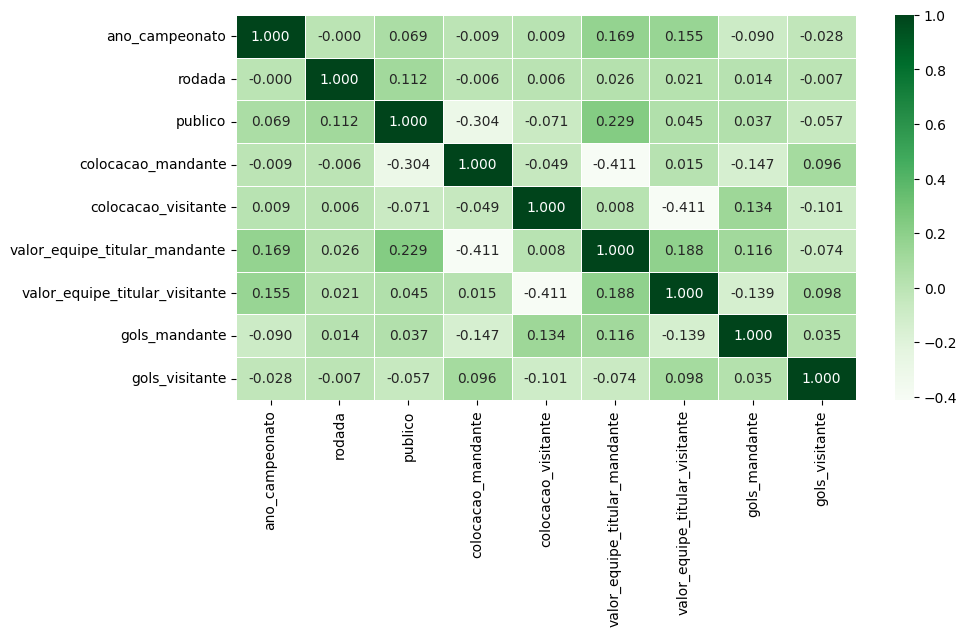

In [53]:
# Observando a correlação entre os atributos (features) numéricos, por meio de um mapa de calor,
# com as bibliotecas mathplotlib e seaborn

plt.figure(figsize=(10,5))
sns.heatmap(df_brasileirao.corr(numeric_only = True), annot = True, cmap='Greens', linewidths=0.5 , fmt = '.3f') #annot=Trye escreve os valores no mapa

#se houvesse alguma dupla de features com correlação = 1 ou = -1 (ou muito próxima desses valores), provavelmente excluiríamos uma delas da base (após análise cuidadosa)
#correlação vai de -1 a 1

## ANÁLISE DE OUTLIERS

### Definição de algumas funções que irão ajudar na análise dos outliers

In [54]:
#para calcular os limites de uma coluna na amostra
#valores acima do superior ou abaixo do inferior são considerados outliers
def limites(coluna):
    q1 = coluna.quantile(0.25) #1ºQuartil da amostra
    q3 = coluna.quantile(0.75) #3ºQuartil da amostra
    amplitude = q3-q1 # Distância Interquartil = Valor do 3º Quartil - Valor do 1º Quartil (Q3 - Q1)

    limite_inferior = q1-1.5*amplitude
    limite_superior = q3+1.5*amplitude

    return limite_inferior, limite_superior

# Para a exclusão de outliers de uma coluna (atributo)
def excluir_outliers(df, nome_coluna):
    qtd_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])

    #filtrando somente as linhas que não representam outliers na coluna price. Retorna essas linhas com todas as colunas
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]

    linhas_removidas = qtd_linhas - df.shape[0]

    return df, linhas_removidas

In [79]:
#funções (procedimentos) para desenhar os gráficos que precisaremos para nossas análises de outliers
def diagrama_caixa(coluna):  #boxplot
    fig, (ax1, ax2) = plt.subplots(1,2) #como vou desenhar dois gráficos na mesma linha, uso esse padrão (ax1 e ax2 são os dois gráficos)
    fig.set_size_inches(15, 5)          #(1,2) significa 1 linha e duas colunas

    sns.set_style("whitegrid", {"grid.linestyle": "--"})
    sns.boxplot(x=coluna, ax=ax1) #desenha o primeiro gráfico completo, mostrando os outliers

    ax2.set_xlim(limites(coluna)) #seta os limites do gráfico 2, usnado a função limites
    sns.boxplot(x=coluna, ax=ax2) #desenha o gráfico 2 dentro dos limites, ou seja sem mostrar os outliers

def histograma(coluna): #histograma
    plt.figure(figsize=(15,5))  #padrão utilizado quando temos apenas um gráfico
    sns.set_style("whitegrid", {"grid.linestyle": "--"})
    sns.distplot(coluna, hist = True)

def grafico_barra(coluna): # grafico de barras
    plt.figure(figsize=(15,5))  #padrão utilizado quando temos apenas um gráfico
    #sns.set_style("whitegrid", {"grid.color": "red"})
    sns.set_style("whitegrid", {"grid.linestyle": "--"})
    #sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts() ) # vamos usar a atribuição ao ax, para ajustar os limites
    ax.bar_label(ax.containers[0], fontsize = 10) # label com as qtds na barra


    #ax.set_xlim(limites(coluna)) # vamos restrigir o gráfico aos limites sem outliers, para melhor visualização

### Análise Geral dos outliers

<Axes: >

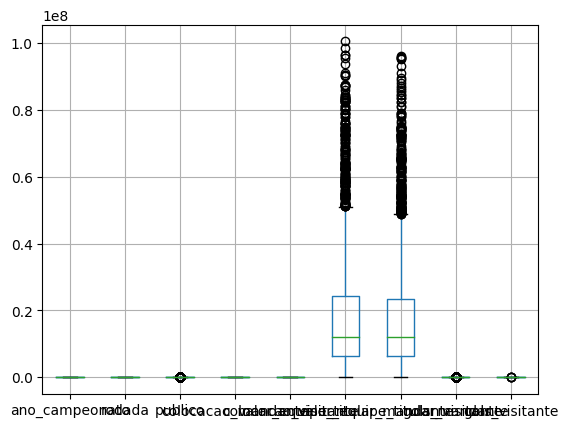

In [56]:
# Usaremos primeiramente um boxplot simples como recurso
# No entanto com as escalas da variáveis são diferentes, fica
# difícil a visualização no mesmo eixo cartesiano
df_brasileirao.boxplot()

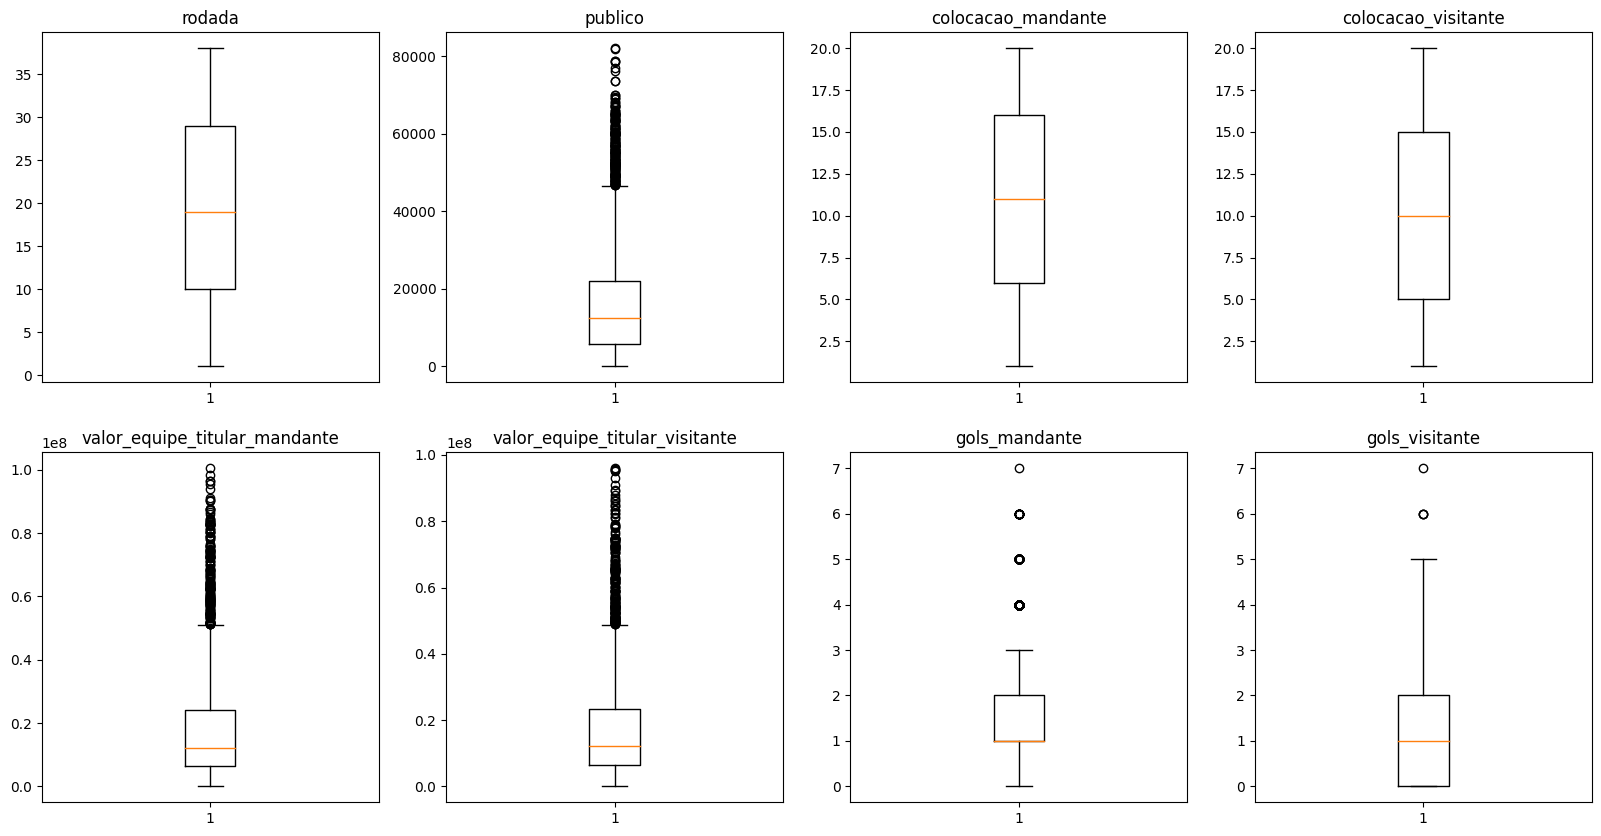

In [57]:
# Analisando melhor com boxplots individuais por variável
# Um para cada variável quantitativa (numérica)

# Obtendo uma lista com os nomes das colunas númericas
quant_cols = [col for col in df_brasileirao.dtypes[2:].index if df_brasileirao.dtypes[2:][col] != 'object' ]

# Agora Vamos percorrer as colunas numéricas e desenhar um boxplot para cada
#definindo o numero de linhas e colunas do nosso gráfico
n_cols = 4  # definimos o numero de colunas fixo = 3
n_linhas =  math.ceil(len(quant_cols) / n_cols) # O número de linhas vai depender da qtd de atributos numéricos. ceil arredonda para cima

fig, axs = plt.subplots(n_linhas, n_cols, figsize=(20,10)) # definindo a área da figura (colunas e linhas)
i = -1
for linha in range(n_linhas):
  for coluna in range(n_cols):
    i += 1
    #desenhamos o boxplot para o atributo da iteração, caso ainda tenha (em alguns casos o útlimo espaço ficará vazio)
    if i <= (len(quant_cols) - 1):
      axs[linha,coluna].set_title(quant_cols[i])
      axs[linha,coluna].boxplot(df_brasileirao[quant_cols[i]])


plt.show()

#### Nos gráficos de boxplot acima, podemos concluir que os atributos rodada, colocacao_mandante e colocacao_visitante não possuem outliers, pois não apresentam ocorrências fora dos limites do gráfico.
#### Complementarmente, vamos organizar os totais e percentuais de outliers por atributo em um dataframe, para melhor análise

In [58]:
# Vamos organizar em dataframe a qtd e percentuais de outliers por atributo

outliers = []
label_outliers = []
for col in quant_cols:
    lim_inf, lim_sup = limites(df_brasileirao[col])
    outlier = 0

    for j in df_brasileirao.index:
        if df_brasileirao.loc[j, col] < lim_inf:
            outlier = outlier + 1
        elif df_brasileirao.loc[j, col] > lim_sup:
            outlier= outlier + 1
        else:
            pass

    outliers.append(outlier)
    label_outliers.append('Total de Outliers: {} ({:.2%})'.format(outlier, outlier/len(df_brasileirao) )  )

#monta o dataframe com os dados
df_outlier = pd.DataFrame()
df_outlier['Variável'] = quant_cols
df_outlier['Total_de_Linhas'] = len(df_brasileirao)
df_outlier['Qtd_Outliers'] = outliers
df_outlier['Percent_Outliers'] = round( (outliers/df_outlier.Total_de_Linhas) * 100, 2)
df_outlier['Label_Outliers'] = label_outliers

df_outlier

,Variável,Total_de_Linhas,Qtd_Outliers,Percent_Outliers,Label_Outliers
0,rodada,6459,0,0.00,Total de Outliers: 0 (0.00%)
1,publico,6459,214,3.31,Total de Outliers: 214 (3.31%)
2,colocacao_mandante,6459,0,0.00,Total de Outliers: 0 (0.00%)
3,colocacao_visitante,6459,0,0.00,Total de Outliers: 0 (0.00%)
4,valor_equipe_titular_mandante,6459,195,3.02,Total de Outliers: 195 (3.02%)
5,valor_equipe_titular_visitante,6459,202,3.13,Total de Outliers: 202 (3.13%)
6,gols_mandante,6459,404,6.25,Total de Outliers: 404 (6.25%)
7,gols_visitante,6459,4,0.06,Total de Outliers: 4 (0.06%)


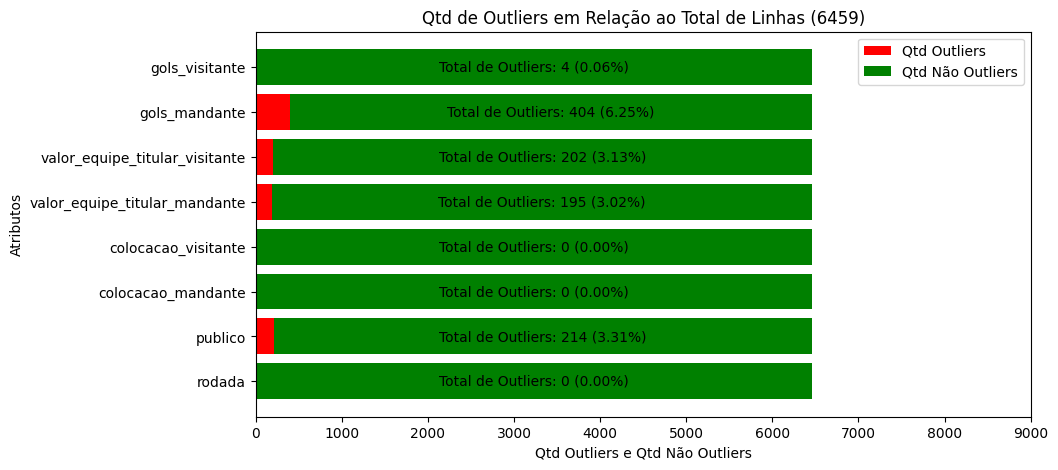

In [59]:
# VAMOS VISUALIZAR GRAFICAMENTE A PORCENTAGEM DE OUTLIERS
# COM A BIBLIOTECA MATPLOTLIB

# Tamanho do Gráfico
plt.figure(figsize=(10,5))

#Criando as barras
bar1 = plt.barh(df_outlier.Variável, df_outlier.Qtd_Outliers, color = 'red')
bar2 = plt.barh(df_outlier.Variável, df_outlier.Total_de_Linhas - df_outlier.Qtd_Outliers, color = 'green', left = df_outlier.Qtd_Outliers )

# Isso é para colocar labels com os valores nas barras
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html
plt.bar_label(bar2, df_outlier.Label_Outliers, label_type = 'center')


# Adicionando legendas
plt.ylabel('Atributos')
plt.xlabel('Qtd Outliers e Qtd Não Outliers')
plt.title('Qtd de Outliers em Relação ao Total de Linhas ({})'.format(df_brasileirao.shape[0]))
plt.legend(('Qtd Outliers', 'Qtd Não Outliers'))

plt.xlim(right = 9000) # aumentando o limite do exio x,para a legenda não ficar em cima do gráfico

plt.show()

#### Confirmando que os atributos rodada, colocacao_mandante e colocacao_visitante não possuem outliers.
#### Para os demais atributos (publico, valor_equipe_titular_mandante, valor_equipe_titular_visitante, gols_mandante e gols_visitante), há um pequno percentual de outliers, mas faremos uma análise mais detalhada um a um

#### Análise Outlier gols_visitante

In [60]:
# Primeiramente um simples describe
# Para ver a estatística descritiva do atributo
df_brasileirao['gols_visitante'].describe()

count    6459.000000
mean        0.989782
std         0.997312
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: gols_visitante, dtype: float64

In [61]:
# Simples value_counts para ver a quantidade de ocorrências de cada valor (tabela de frequências)
df_brasileirao['gols_visitante'].value_counts()

0.0    2416
1.0    2342
2.0    1201
3.0     376
4.0     104
5.0      16
6.0       3
7.0       1
Name: gols_visitante, dtype: int64

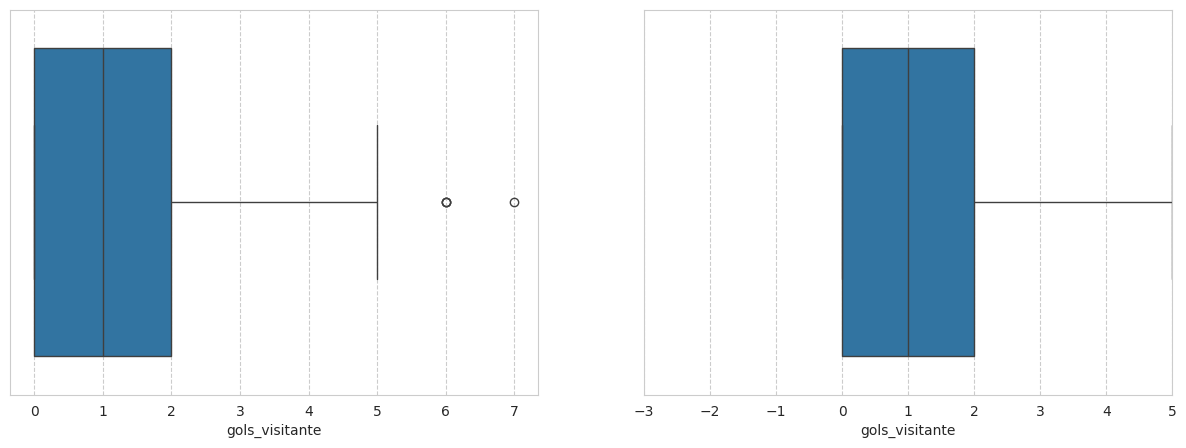

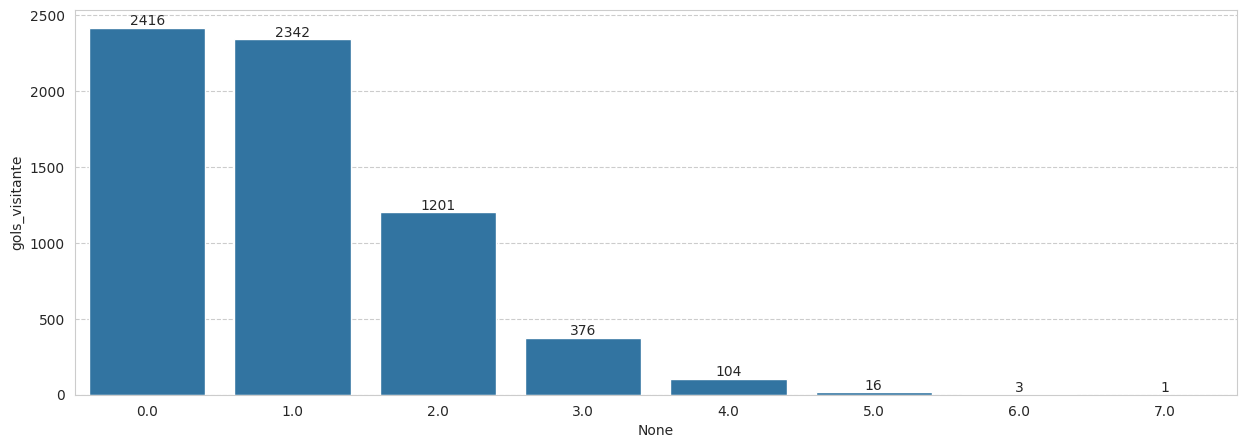

In [74]:
# Plotando gráficos para melhor visualização
diagrama_caixa(df_brasileirao['gols_visitante']) # boxplot para ver a distribuição nos quartis
#histograma(df_brasileirao['gols_visitante'])
grafico_barra(df_brasileirao['gols_visitante'])

In [81]:
# Ao analisar as informações e os gráficos, pode-se perceber que nesse caso, os outiliers são apenas casos raros em que o visitante marcou 6 ou 7 gols (apenas 4 casos)
# Então estes outliers não devem ser retirados da base. São dados corretos.
# Apenas por curiosidade, vamos visualizar esses casos.
df_brasileirao[df_brasileirao['gols_visitante'] > 5].round(2)

,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
1,2007,2007-05-03,1,6222.0,Figueirense FC,Athletico-PR,18.0,1.0,3637500.0,2804545.45,3.0,6.0
519,2008,2008-07-24,14,0.0,Figueirense FC,Grêmio,8.0,2.0,8850000.0,11700000.00,1.0,7.0
3839,2017,2017-06-09,5,14403.0,Chapecoense,Grêmio,1.0,3.0,12050000.0,28300000.00,3.0,6.0
6338,2023,2023-10-07,26,9001.0,Goiás,EC Bahia,18.0,16.0,1048.0,2105.00,4.0,6.0


#### Análise Outlier gols_mandante

In [82]:
# Primeiramente um simples describe
# Para ver a estatística descritiva do atributo
df_brasileirao['gols_mandante'].describe()

count    6459.000000
mean        1.484131
std         1.195708
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: gols_mandante, dtype: float64

In [83]:
# Simples value_counts para ver a quantidade de ocorrências de cada valor (tabela de frequências)
df_brasileirao['gols_mandante'].value_counts()

1.0    2229
2.0    1618
0.0    1414
3.0     794
4.0     301
5.0      84
6.0      18
7.0       1
Name: gols_mandante, dtype: int64

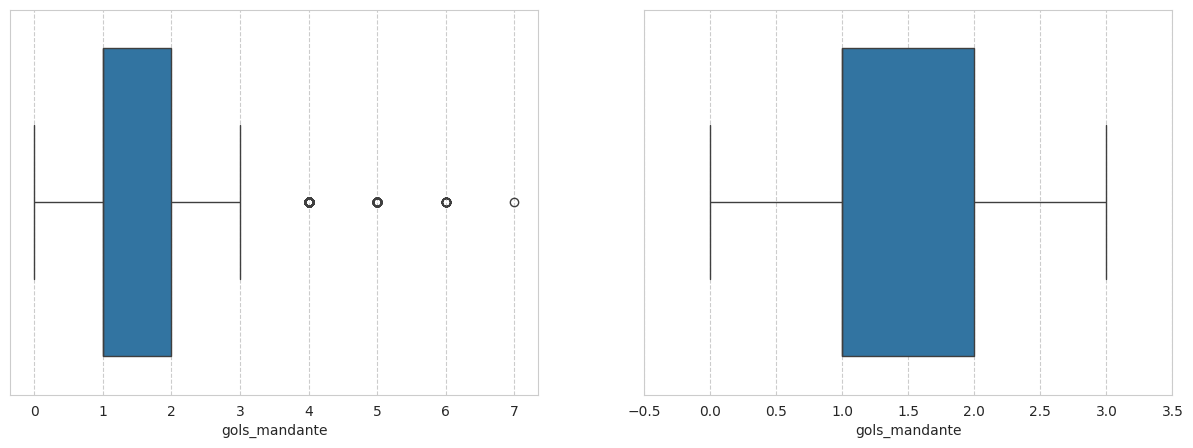

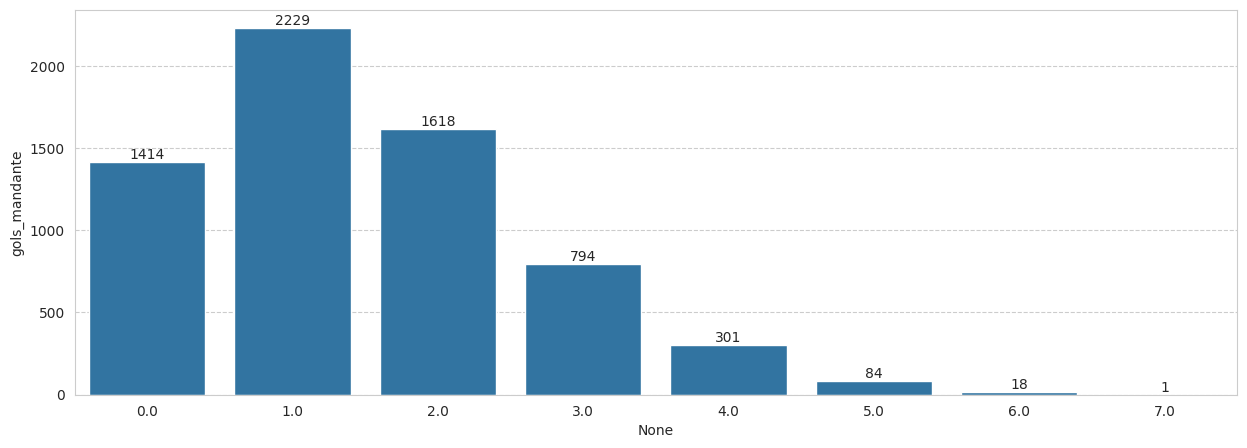

In [85]:
# Plotando gráficos para melhor visualização
diagrama_caixa(df_brasileirao['gols_mandante']) # boxplot para ver a distribuição nos quartis
#histograma(df_brasileirao['gols_visitante'])
grafico_barra(df_brasileirao['gols_mandante'])

In [86]:
# Ao analisar as informações e os gráficos, pode-se perceber que nesse caso, os outiliers são apenas casos em que o mandante marcou mais de 3 gols
# Então estes outliers não devem ser retirados da base. São dados corretos.
# Apenas por curiosidade, vamos visualizar os casos em que o mandante marcou mais de 5 gols.
df_brasileirao[df_brasileirao['gols_mandante'] > 5].round(2)

,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
224,2007,2007-09-01,23,36496.0,São Paulo,Paraná,1.0,14.0,15700000.00,750000.00,6.0,0.0
539,2008,2008-07-31,16,4810.0,Vasco da Gama,Atlético-MG,16.0,12.0,8600000.00,5500000.00,6.0,1.0
856,2009,2009-07-12,10,17090.0,EC Vitória,Santos,4.0,9.0,10400000.00,14100000.00,6.0,2.0
1148,2010,2010-05-09,1,6539.0,Avaí FC,Barueri,1.0,20.0,6850000.00,6800000.00,6.0,1.0
1895,2011,2011-12-04,38,18500.0,Cruzeiro,Atlético-MG,16.0,14.0,15250000.00,13950000.00,6.0,1.0
2179,2012,2012-10-06,28,16952.0,Atlético-MG,Figueirense FC,2.0,19.0,23050000.00,3800000.00,6.0,0.0
2639,2013,2013-11-24,36,2472.0,Athletico-PR,Náutico,4.0,20.0,4600000.00,3450000.00,6.0,1.0
2697,2014,2014-05-11,4,4992.0,Botafogo,Criciúma EC,19.0,15.0,18400000.00,4900000.00,6.0,0.0
2889,2014,2014-09-21,23,7845.0,Goiás,Palmeiras,12.0,18.0,6200000.00,10800000.00,6.0,0.0
3258,2015,2015-09-03,22,15021.0,Internacional,Vasco da Gama,12.0,20.0,25908333.33,11066666.67,6.0,0.0


#### Análise Outlier valor_equipe_titular_visitante

In [91]:
# Primeiramente um simples describe
# Para ver a estatística descritiva do atributo
df_brasileirao['valor_equipe_titular_visitante'].describe().round(2)

count        6459.00
mean     16269934.95
std      13860799.04
min           593.00
25%       6450000.00
50%      12100000.00
75%      23400000.00
max      96000000.00
Name: valor_equipe_titular_visitante, dtype: float64

In [93]:
# Simples value_counts para ver a quantidade de ocorrências de cada valor (tabela de frequências)
df_brasileirao['valor_equipe_titular_visitante'].value_counts()

# Não faz muito sentido aqui, pois os valores são muito dispersos, e muitas ocorrências diferentes

4400000.0     27
5450000.0     27
5600000.0     26
4000000.0     24
5400000.0     23
              ..
3430000.0      1
79050000.0     1
2930000.0      1
18330000.0     1
81150000.0     1
Name: valor_equipe_titular_visitante, Length: 1522, dtype: int64

<ipython-input-79-87283430813e>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coluna, hist = True)


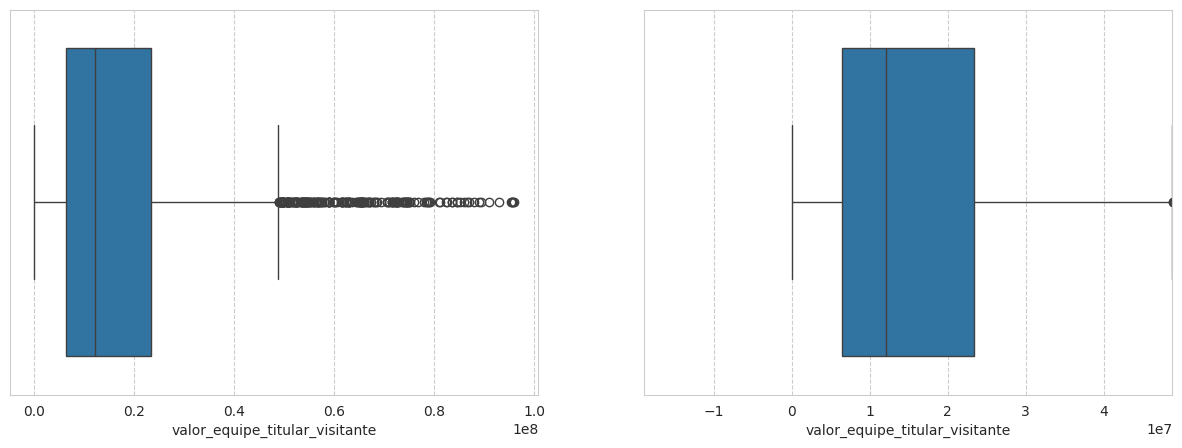

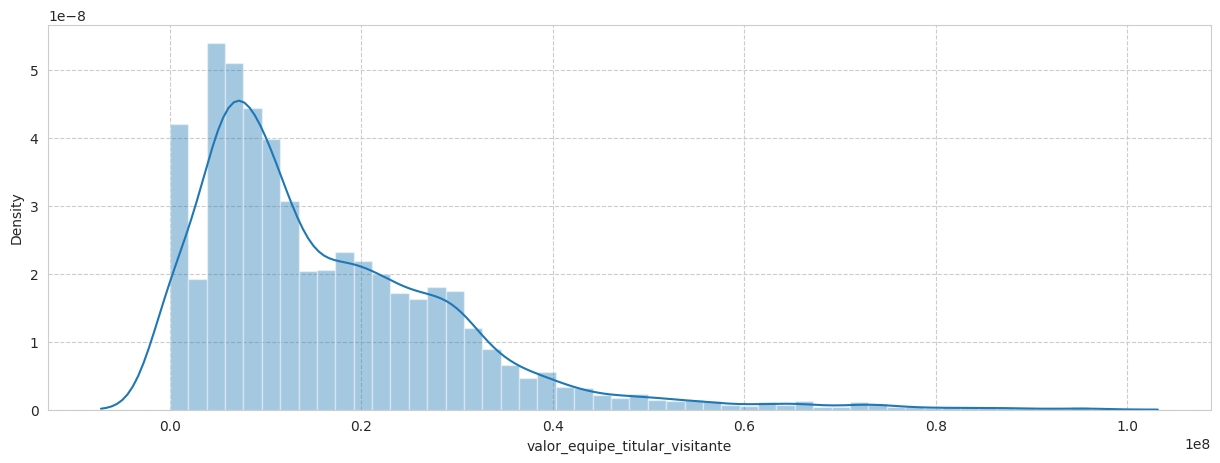

In [98]:
# Plotando gráficos para melhor visualização
diagrama_caixa(df_brasileirao['valor_equipe_titular_visitante'].round(0)) # boxplot para ver a distribuição nos quartis
histograma(df_brasileirao['valor_equipe_titular_visitante'].round(0))
#grafico_barra(df_brasileirao['valor_equipe_titular_visitante']) # Não faz muito sentido aqui, pois os valores são muito dispersos, e muitas ocorrências diferentes

In [129]:
# Vamos fazer uma análise por ano, para perceber se há diferenças entre escalas de valor
#anos = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
#obtem os anos no dataset, já ordenados
anos = sorted(list(df_brasileirao['ano_campeonato'].value_counts().index))

#compoeo um DF com as estatisiticas descritivas por ano
df_describe = pd.DataFrame()

for ano in anos:
  df_describe_ano = pd.DataFrame( df_brasileirao[df_brasileirao['ano_campeonato'] == ano]['valor_equipe_titular_visitante'].describe().round(2) ).rename(columns={'valor_equipe_titular_visitante': ano}).T
  df_describe = pd.concat([df_describe, df_describe_ano])

df_describe

,count,mean,std,min,25%,50%,75%,max
2007,380.0,5542941.18,6025285.89,50000.0,1373333.33,3345833.33,7512500.00,31550000.0
2008,380.0,14196871.35,8660498.87,1750000.0,7350000.00,11050000.00,20225000.00,42800000.0
2009,380.0,14629389.40,9888386.45,550000.0,7537500.00,10875000.00,20141176.47,42750000.0
2010,380.0,14767395.77,8647119.00,2950000.0,6337500.00,13100000.00,21812500.00,53500000.0
2011,380.0,15034869.44,11441466.74,1950000.0,5087500.00,15100000.00,20617361.11,72100000.0
2012,380.0,15234561.40,14257234.79,1700000.0,4300000.00,12575000.00,19550000.00,74500000.0
2013,380.0,12778413.93,9102152.87,3050000.0,5037500.00,9100000.00,19900000.00,46000000.0
2014,380.0,13841578.95,10163115.97,150000.0,5875000.00,10000000.00,20050000.00,46850000.0
2015,380.0,21585188.60,11702240.06,4800000.0,11500000.00,18916666.67,29887500.00,56500000.0
2016,379.0,19340759.92,9971423.46,3700000.0,10150000.00,18700000.00,27900000.00,44250000.0


<ipython-input-79-87283430813e>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coluna, hist = True)


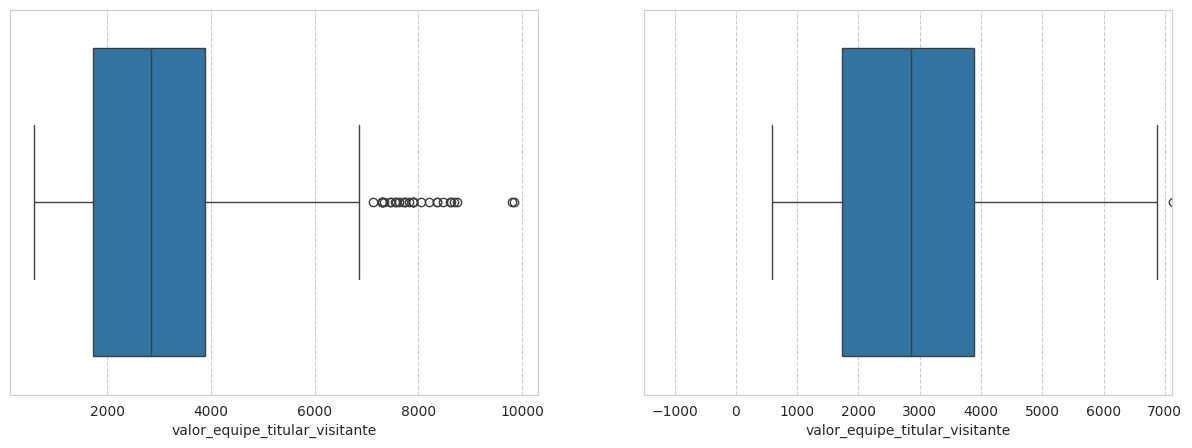

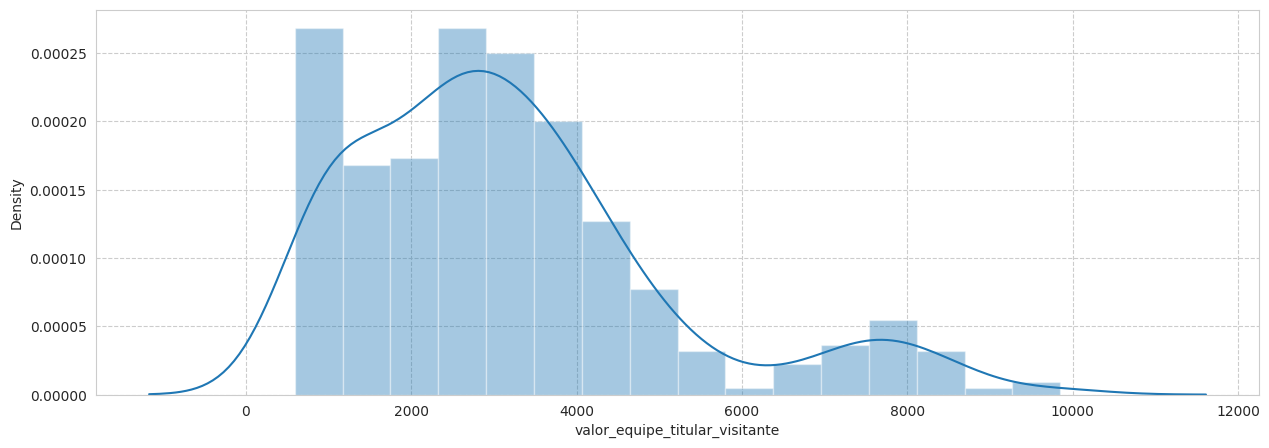

In [136]:
# Plotando gráficos por ano, para ánalise
# Mas vamos ver um de cada vez
ano = 2023
df_ano = df_brasileirao[df_brasileirao['ano_campeonato'] == ano]

df_ano

diagrama_caixa(df_ano['valor_equipe_titular_visitante']) # boxplot para ver a distribuição nos quartis
histograma(df_ano['valor_equipe_titular_visitante'])
#grafico_barra(df_brasileirao['valor_equipe_titular_visitante']) # Não faz muito sentido aqui, pois os valores são muito dispersos, e muitas ocorrências diferentes

In [138]:
df_ano[df_ano['time_visitante'] == 'Palmeiras']

,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
6097,2023,2023-04-23,2,59867.0,Vasco da Gama,Palmeiras,5.0,4.0,4970.000000,6720.000000,2.0,2.0
6118,2023,2023-05-07,4,13789.0,Goiás,Palmeiras,18.0,2.0,1070.000000,8350.000000,0.0,5.0
6140,2023,2023-05-21,7,12641.0,Santos,Palmeiras,9.0,2.0,2840.000000,8350.000000,0.0,0.0
6155,2023,2023-05-28,8,53236.0,Atlético-MG,Palmeiras,4.0,2.0,4530.000000,7820.000000,1.0,1.0
6176,2023,2023-06-11,10,56871.0,São Paulo,Palmeiras,8.0,2.0,2550.000000,7480.000000,0.0,2.0
6179,2023,2023-06-22,11,31013.0,EC Bahia,Palmeiras,14.0,2.0,3055.000000,7130.000000,1.0,0.0
6206,2023,2023-07-02,13,33118.0,Athletico-PR,Palmeiras,9.0,4.0,4840.000000,5075.000000,2.0,2.0
6219,2023,2023-07-16,15,41823.0,Internacional,Palmeiras,11.0,6.0,4115.000000,7345.000000,0.0,0.0
6248,2023,2023-07-30,17,5928.0,América-MG,Palmeiras,20.0,4.0,1200.000000,8750.000000,1.0,4.0
6255,2023,2023-08-06,18,31037.0,Fluminense,Palmeiras,3.0,5.0,3585.000000,5800.000000,2.0,1.0


#### Na tabela acima, percebemos que pode haver diferenças na escala a cada ano, principlamente no ano de 2023.
#### Não vamos excluir os outliers. Uma boa opção é categorizar esse atributo, o que iremos fazer em etapas mais para frente (vamos tirar a média por time por ano, e criar categorias ano a ano)

## ENGENHARIA DE ATRIBUTOS (FEATURE ENGINERING)

## excluir jogos com público 0

In [ ]:
### ANTES DE EXCLUIR ESSES JOGOS, TEMOS QUE FAZER A ENGENHARIA DE ATRIBUTOS (CRIAR ATRIBUTOS BASEADOS EM DESEMPENHO RECENTE)

### VER PARA TODOS OS DADOS (DARO GROUP BY POR ANO)
df_brasileirao[df_brasileirao['publico'] == 0]

,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
5,2007,2007-05-03,1,0.0,São Paulo,Goiás,5.0,17.0,2.024000e+07,1.958333e+06,2.0,0.0
130,2007,2007-07-27,14,0.0,Botafogo,Juventude,1.0,18.0,5.937500e+06,1.043333e+06,3.0,1.0
267,2007,2007-09-23,27,0.0,Náutico,Sport Recife,18.0,10.0,2.700000e+06,3.000000e+06,2.0,0.0
369,2007,2007-11-24,37,0.0,América-RN,Grêmio,20.0,7.0,5.000000e+04,9.452778e+06,0.0,3.0
381,2008,2008-05-11,1,0.0,Flamengo,Santos,1.0,17.0,2.740000e+07,1.000000e+07,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6249,2023,2023-08-06,18,0.0,Vasco da Gama,Grêmio,18.0,4.0,3.630000e+03,3.560000e+03,1.0,0.0
6256,2023,2023-08-05,18,0.0,Santos,Athletico-PR,17.0,7.0,3.600000e+03,2.365000e+03,1.0,1.0
6408,2023,2023-11-22,33,0.0,Cruzeiro,Vasco da Gama,14.0,16.0,1.955333e+03,3.462143e+03,2.0,2.0
6434,2023,2023-11-29,36,0.0,Coritiba FC,Botafogo,19.0,2.0,1.681786e+03,2.481429e+03,1.0,1.0


In [ ]:
df_brasileirao.dtypes

ano_campeonato                             int64
data                              datetime64[ns]
rodada                                     int64
publico                                  float64
time_mandante                             object
time_visitante                            object
colocacao_mandante                       float64
colocacao_visitante                      float64
valor_equipe_titular_mandante            float64
valor_equipe_titular_visitante           float64
gols_mandante                            float64
gols_visitante                           float64
dtype: object